In [182]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud
import plotly.express as px
import re
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn. feature_extraction.text import CountVectorizer
from sklearn. decomposition import LatentDirichletAllocation

In [183]:
#load the datasets
movies_df = pd.read_csv('/Users/nandankumarbhunia/Desktop/Data/rotten_tomatoes_movies.csv')
reviews_df = pd.read_csv('/Users/nandankumarbhunia/Desktop/Data/rotten_tomatoes_movie_reviews.csv')

In [184]:
movies_df.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN
1,the_green_grass,The Green Grass,NaN,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,NaN,NaN,NaN
2,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",NaN,NaN,NaN
3,the_sore_losers_1997,Sore Losers,60.0,NaN,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,NaN,NaN,NaN
4,dinosaur_island_2002,Dinosaur Island,70.0,NaN,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,NaN,NaN,NaN


In [185]:
movies_df.tail()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
143253,nadia_the_secret_of_blue_water_the_motion_pict...,Nadia: The Secret of Blue Water: The Motion Pi...,14.0,NaN,NaN,NaN,2002-08-27,NaN,90.0,"Action, Adventure, Anime",Japanese,Sho Aono,Kaoru Umeno,NaN,ADV Films,NaN
143254,everyone_i_knew_and_loved,Everyone I Knew and Loved,NaN,NaN,NaN,NaN,NaN,NaN,99.0,Drama,English,Andrew Behringer,Erika Heidewald,NaN,NaN,NaN
143255,the-human-body,The Human Body,71.0,89.0,NaN,NaN,NaN,NaN,43.0,Documentary,English,Peter Georgi,Richard Dale,NaN,NaN,NaN
143256,flying_fists,Flying Fists,NaN,NaN,NaN,NaN,NaN,2006-11-21,63.0,Drama,English,Robert F. Hill,"Robert F. Hill,Basil Dickey",NaN,NaN,NaN
143257,awakening-2005,Awakening,NaN,NaN,NaN,NaN,NaN,NaN,90.0,Horror,English,David J. Francis,"David J. Francis,Mike Masters",NaN,NaN,NaN


In [186]:
reviews_df.head()

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...


In [187]:
reviews_df.tail()

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
1444958,thor_love_and_thunder,102706151,2022-07-05,Christie Cronan,False,7/10,fresh,Raising Whasians,Solid but not totally sold&#44; Thor&#58; Ragn...,POSITIVE,https://raisingwhasians.com/thor-love-and-thun...
1444959,thor_love_and_thunder,102706150,2022-07-05,Ian Sandwell,False,4/5,fresh,Digital Spy,Thor&#58; Love and Thunder is the most enterta...,POSITIVE,https://www.digitalspy.com/movies/a40496050/th...
1444960,thor_love_and_thunder,102706149,2022-07-05,Lauren LaMagna,False,8/10,fresh,Next Best Picture,&quot;Thor&#58; Love and Thunder&quot; is a st...,POSITIVE,https://www.nextbestpicture.com/thor-love-and-...
1444961,thor_love_and_thunder,102706148,2022-07-05,Jake Cole,True,1/4,rotten,Slant Magazine,Across Taika Waititi&#8217;s film&#44; a war a...,NEGATIVE,https://www.slantmagazine.com/film/thor-love-a...
1444962,thor_love_and_thunder,102706147,2022-07-05,Roger Moore,False,2.5/4,fresh,Movie Nation,It&#8217;s the jokes that make it&#44; with th...,POSITIVE,https://rogersmovienation.com/2022/07/05/movie...


In [188]:
movies_df.shape

(143258, 16)

In [189]:
reviews_df.shape

(1444963, 11)

In [190]:
movies_df.columns

Index(['id', 'title', 'audienceScore', 'tomatoMeter', 'rating',
       'ratingContents', 'releaseDateTheaters', 'releaseDateStreaming',
       'runtimeMinutes', 'genre', 'originalLanguage', 'director', 'writer',
       'boxOffice', 'distributor', 'soundMix'],
      dtype='object')

In [191]:
reviews_df.columns

Index(['id', 'reviewId', 'creationDate', 'criticName', 'isTopCritic',
       'originalScore', 'reviewState', 'publicatioName', 'reviewText',
       'scoreSentiment', 'reviewUrl'],
      dtype='object')

In [192]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    143258 non-null  object 
 1   title                 142891 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   tomatoMeter           33877 non-null   float64
 4   rating                13991 non-null   object 
 5   ratingContents        13991 non-null   object 
 6   releaseDateTheaters   30773 non-null   object 
 7   releaseDateStreaming  79420 non-null   object 
 8   runtimeMinutes        129431 non-null  float64
 9   genre                 132175 non-null  object 
 10  originalLanguage      129400 non-null  object 
 11  director              139064 non-null  object 
 12  writer                90116 non-null   object 
 13  boxOffice             14743 non-null   object 
 14  distributor           23005 non-null   object 
 15  

In [193]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444963 entries, 0 to 1444962
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id              1444963 non-null  object
 1   reviewId        1444963 non-null  int64 
 2   creationDate    1444963 non-null  object
 3   criticName      1444963 non-null  object
 4   isTopCritic     1444963 non-null  bool  
 5   originalScore   1009745 non-null  object
 6   reviewState     1444963 non-null  object
 7   publicatioName  1444963 non-null  object
 8   reviewText      1375738 non-null  object
 9   scoreSentiment  1444963 non-null  object
 10  reviewUrl       1234038 non-null  object
dtypes: bool(1), int64(1), object(9)
memory usage: 111.6+ MB


In [194]:
movies_df.describe()

,audienceScore,tomatoMeter,runtimeMinutes
count,73248.000000,33877.000000,129431.000000
mean,55.674967,65.770346,93.708578
std,24.553648,28.023203,28.129175
min,0.000000,0.000000,1.000000
25%,37.000000,45.000000,84.000000
50%,57.000000,73.000000,92.000000
75%,76.000000,89.000000,103.000000
max,100.000000,100.000000,2700.000000


In [195]:
reviews_df.describe()

,reviewId
count,1.444963e+06
mean,9.035203e+06
std,2.575716e+07
min,1.000000e+00
25%,1.610366e+06
50%,2.200337e+06
75%,2.587024e+06
max,1.027962e+08


In [196]:
#check for null values in both df
print("num of null values in movies_df:- ",movies_df.isnull().sum().sort_values(ascending=False))
print("num of null values in reviews_df:- ",reviews_df.isnull().sum().sort_values(ascending=False))

num of null values in movies_df:-  rating                  129267
ratingContents          129267
boxOffice               128515
soundMix                127341
distributor             120253
releaseDateTheaters     112485
tomatoMeter             109381
audienceScore            70010
releaseDateStreaming     63838
writer                   53142
originalLanguage         13858
runtimeMinutes           13827
genre                    11083
director                  4194
title                      367
id                           0
dtype: int64
num of null values in reviews_df:-  originalScore     435218
reviewUrl         210925
reviewText         69225
id                     0
reviewId               0
creationDate           0
criticName             0
isTopCritic            0
reviewState            0
publicatioName         0
scoreSentiment         0
dtype: int64


In [197]:
print("total unique movies id:- ",movies_df["id"].nunique())
print("total unique movies name:- ",movies_df["title"].nunique())
print("total movies with reviews:- ",reviews_df["id"].nunique())

total unique movies id:-  142052
total unique movies name:-  126403
total movies with reviews:-  69263


<AxesSubplot:>

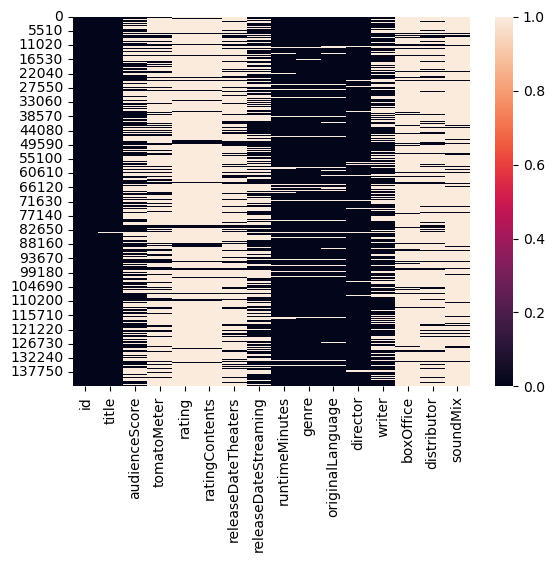

In [198]:
sns. heatmap (movies_df. isnull ())

In [199]:
movies_df. isnull() .sum() * 100 / len(movies_df)

id                       0.000000
title                    0.256181
audienceScore           48.869871
tomatoMeter             76.352455
rating                  90.233704
ratingContents          90.233704
releaseDateTheaters     78.519175
releaseDateStreaming    44.561560
runtimeMinutes           9.651817
genre                    7.736392
originalLanguage         9.673456
director                 2.927585
writer                  37.095311
boxOffice               89.708777
distributor             83.941560
soundMix                88.889277
dtype: float64

In [200]:
reviews_df. isnull() .sum() * 100 / len(reviews_df)

id                 0.000000
reviewId           0.000000
creationDate       0.000000
criticName         0.000000
isTopCritic        0.000000
originalScore     30.119664
reviewState        0.000000
publicatioName     0.000000
reviewText         4.790780
scoreSentiment     0.000000
reviewUrl         14.597260
dtype: float64

In [201]:
movies_df[movies_df["title"].duplicated()]

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
495,home_2021,Home,NaN,NaN,NaN,NaN,NaN,NaN,158.0,"Comedy, Drama",Malayalam,Rojin Thomas,Rojin Thomas,NaN,NaN,NaN
544,1099600-sunset_strip,Sunset Strip,48.0,NaN,NaN,NaN,2000-08-18,2004-06-01,90.0,"Comedy, Drama",English,Adam Collis,"Randall Jahnson,Randall Jahnson,Russell DeGrazier",$3.9K,20th Century Fox,"Surround, Dolby SR, Dolby Digital, Dolby A, Do..."
928,the-pact-2006,The Pact,NaN,NaN,NaN,NaN,NaN,2008-05-13,90.0,Drama,German,Christian Görlitz,Christian Görlitz,NaN,NaN,NaN
1126,mukkam-post-london,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1487,1021262-thirst,Thirst,42.0,100.0,NaN,NaN,NaN,2013-11-25,98.0,Horror,English,Rod Hardy,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143214,1039438-eye_for_an_eye,An Eye for an Eye,NaN,NaN,NaN,NaN,1966-06-01,2018-10-01,92.0,Western,English,Michael Moore,NaN,NaN,Embassy Pictures,NaN
143220,amnesia_2013,Amnesia,NaN,NaN,NaN,NaN,NaN,2017-07-21,80.0,"Drama, Mystery & thriller",Norwegian,Nini Bull Robsahm,Nini Bull Robsahm,NaN,NaN,NaN
143226,hold_up,Hold-Up,NaN,NaN,NaN,NaN,NaN,NaN,169.0,Documentary,French (France),Yann Michel,NaN,NaN,NaN,NaN
143229,the_owners_2014,The Owners,NaN,NaN,NaN,NaN,NaN,NaN,95.0,"Comedy, Drama",Spanish,"Agustín Toscano,Ezequiel Radusky","Agustín Toscano,Ezequiel Radusky",NaN,NaN,Stereo


After looking the difference between total number of rows subracted by the null values and the total number of unique movies title, we can extrapolate that there are lot of duplicate records, in the dateset.
Let's start droping those records.

In [202]:
#drop null and duplicates rows
movies_df.dropna(inplace=True, axis=0)
movies_df.drop_duplicates(inplace=True)
reviews_df.dropna(inplace=True, axis=0)
reviews_df.drop_duplicates(inplace=True)

Lets extarct some more insights from our both the datasets.

In [203]:
#number of unique critics
print(reviews_df["criticName"].nunique())

8438


In [204]:
#let's groupby these critics and check if we can find the duration of their watch history
date_format = "%Y-%m-%d"
for df in reviews_df.groupby("criticName"):
  #sort the creationDate column in asscending order
  sorted_data = df[1].sort_values(by="creationDate")
  #take first row as view start date
  start_date = datetime.strptime(sorted_data['creationDate'].iloc[0], date_format)
  #take last row as view end date
  end_date = datetime.strptime(sorted_data['creationDate'].iloc[-1], date_format)
  #calculate the difference
  delta = end_date-start_date
  #assign the extracted duration to a column in df
  reviews_df.loc[reviews_df['criticName'] == sorted_data.criticName.values.tolist()[0], 'duration'] = round(delta.days/30,1)


In [205]:
reviews_df.columns

Index(['id', 'reviewId', 'creationDate', 'criticName', 'isTopCritic',
       'originalScore', 'reviewState', 'publicatioName', 'reviewText',
       'scoreSentiment', 'reviewUrl', 'duration'],
      dtype='object')

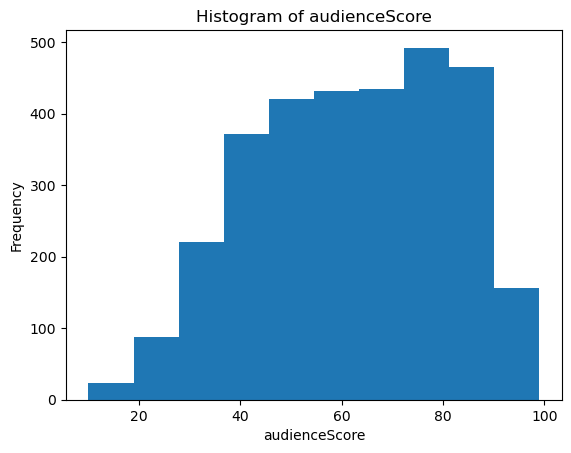

In [206]:
# Plot a histogram of audienceScore column of movies_df
plt.hist(movies_df['audienceScore'])
plt.xlabel('audienceScore')
plt.ylabel('Frequency')
plt.title('Histogram of audienceScore')
plt.show()

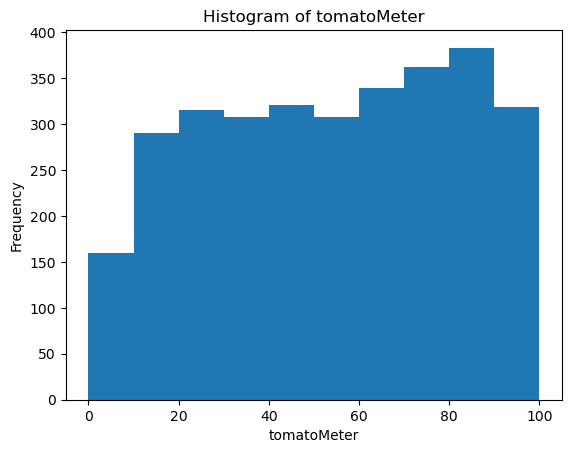

In [207]:
# Plot a histogram of tomatoMeter column of movies_df
plt.hist(movies_df['tomatoMeter'])
plt.xlabel('tomatoMeter')
plt.ylabel('Frequency')
plt.title('Histogram of tomatoMeter')
plt.show()

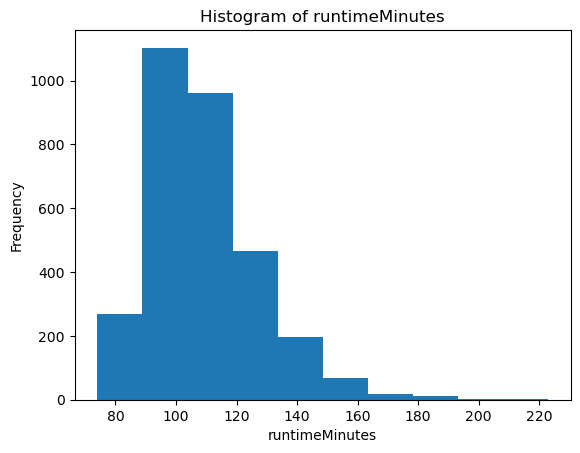

In [208]:
# Plot a histogram of runtimeMinutes column of movies_df
plt.hist(movies_df['runtimeMinutes'])
plt.xlabel('runtimeMinutes')
plt.ylabel('Frequency')
plt.title('Histogram of runtimeMinutes')
plt.show()

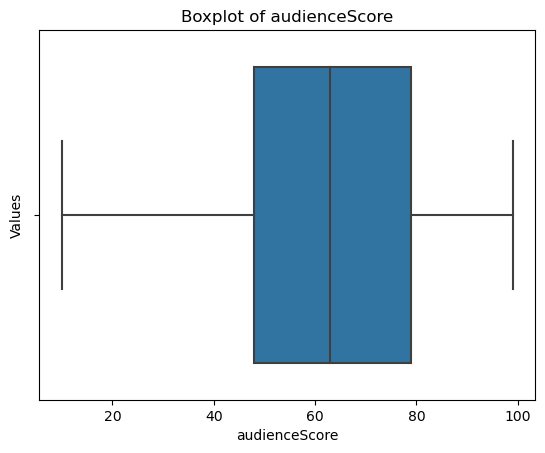

In [209]:
# Create a boxplot of a audienceScore column of movies_df
sns.boxplot(x=movies_df['audienceScore'])
plt.ylabel('Values')
plt.title('Boxplot of audienceScore')
plt.show()

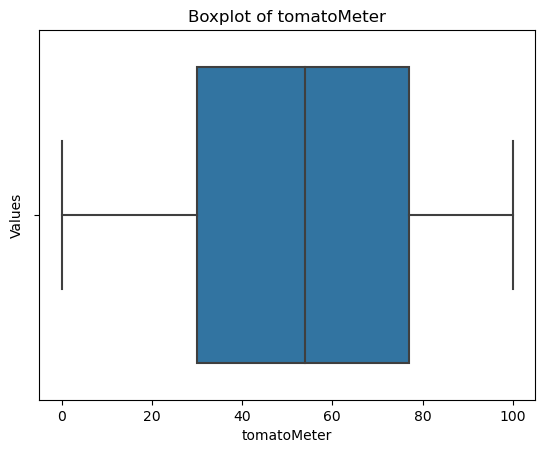

In [210]:
# Create a boxplot of a tomatoMeter column of movies_df
sns.boxplot(x=movies_df['tomatoMeter'])
plt.ylabel('Values')
plt.title('Boxplot of tomatoMeter')
plt.show()

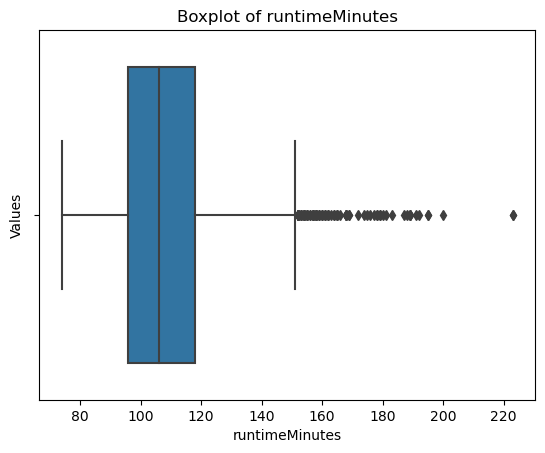

In [211]:
# Create a boxplot of a runtimeMinutes column of movies_df
sns.boxplot(x=movies_df['runtimeMinutes'])
plt.ylabel('Values')
plt.title('Boxplot of runtimeMinutes')
plt.show()

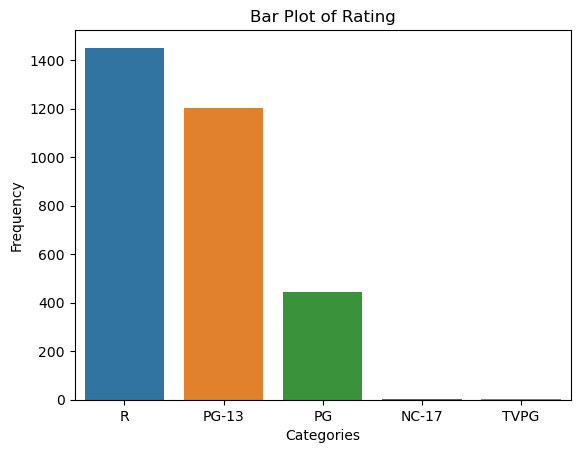

In [212]:
# Create bar plot for categorical variable rating
sns.countplot(x='rating', data=movies_df)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Bar Plot of Rating')
plt.show()

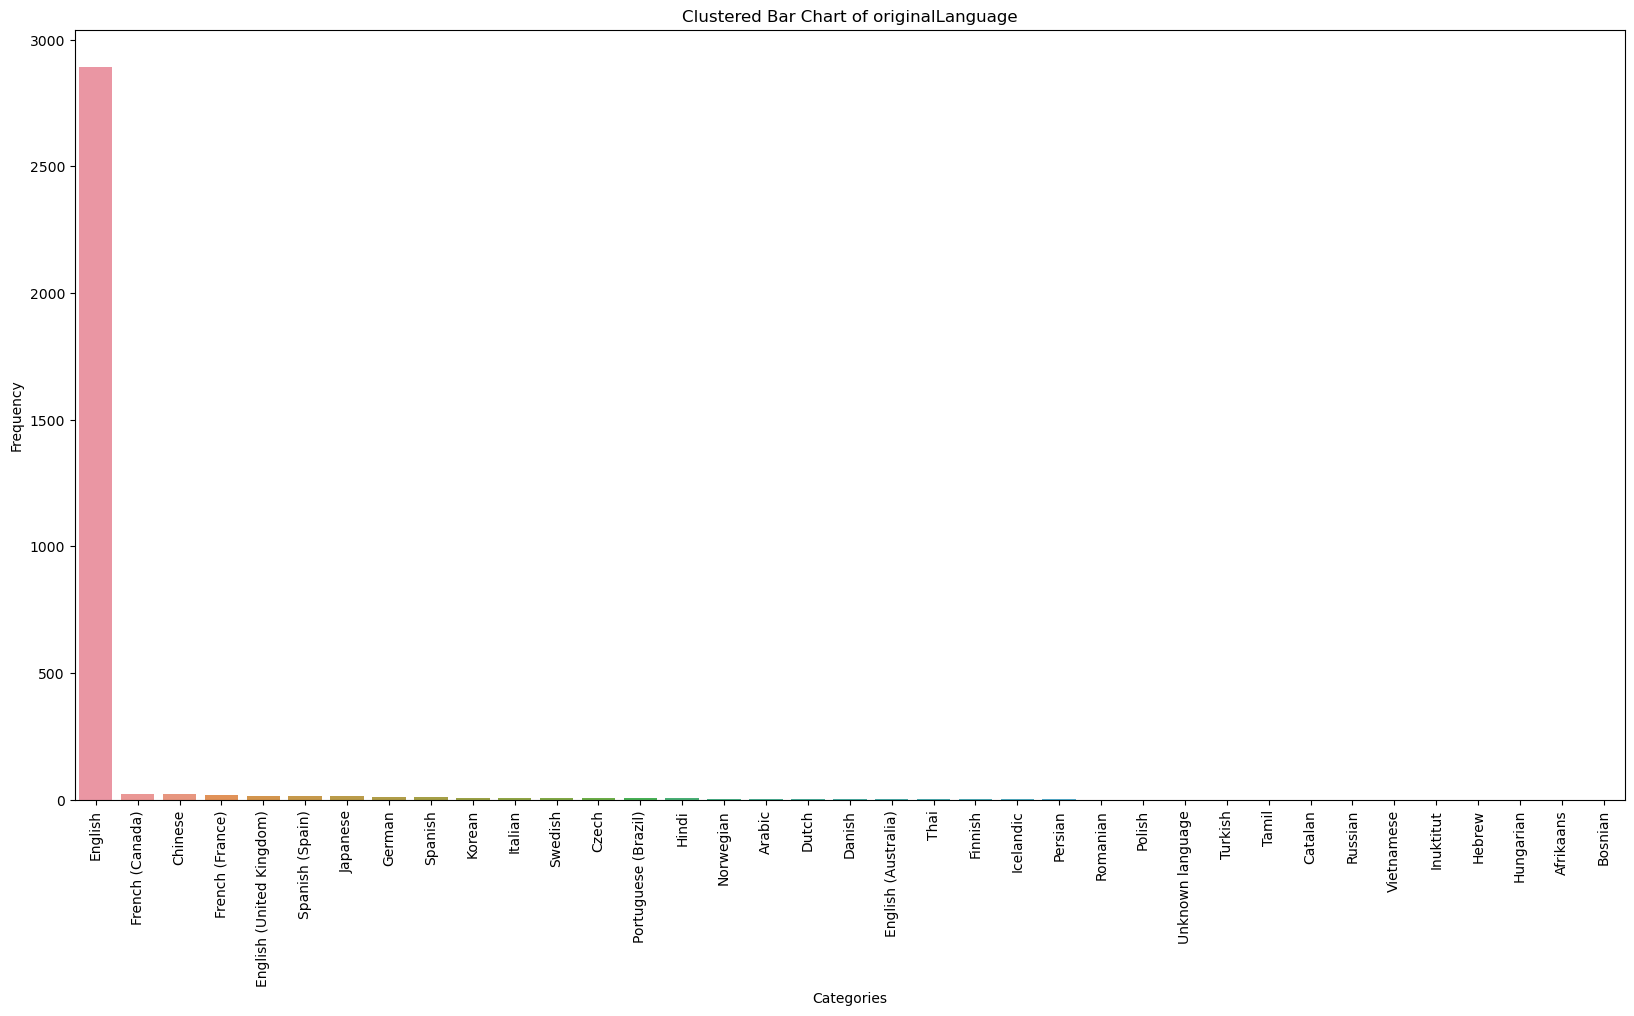

In [213]:
# Create clustered bar plot for OriginalLanguage
# Count the frequency of each category
language_counts = movies_df['originalLanguage'].value_counts()

# Reset the index of the counts
language_counts = language_counts.reset_index()

# Rename the columns
language_counts.columns = ['originalLanguage', 'frequency']

# Plot the clustered bar chart with increased X-axis scale
plt.figure(figsize=(20, 10))
sns.barplot(x='originalLanguage', y='frequency', data=language_counts)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Clustered Bar Chart of originalLanguage')
plt.xticks(rotation=90)
plt.show()

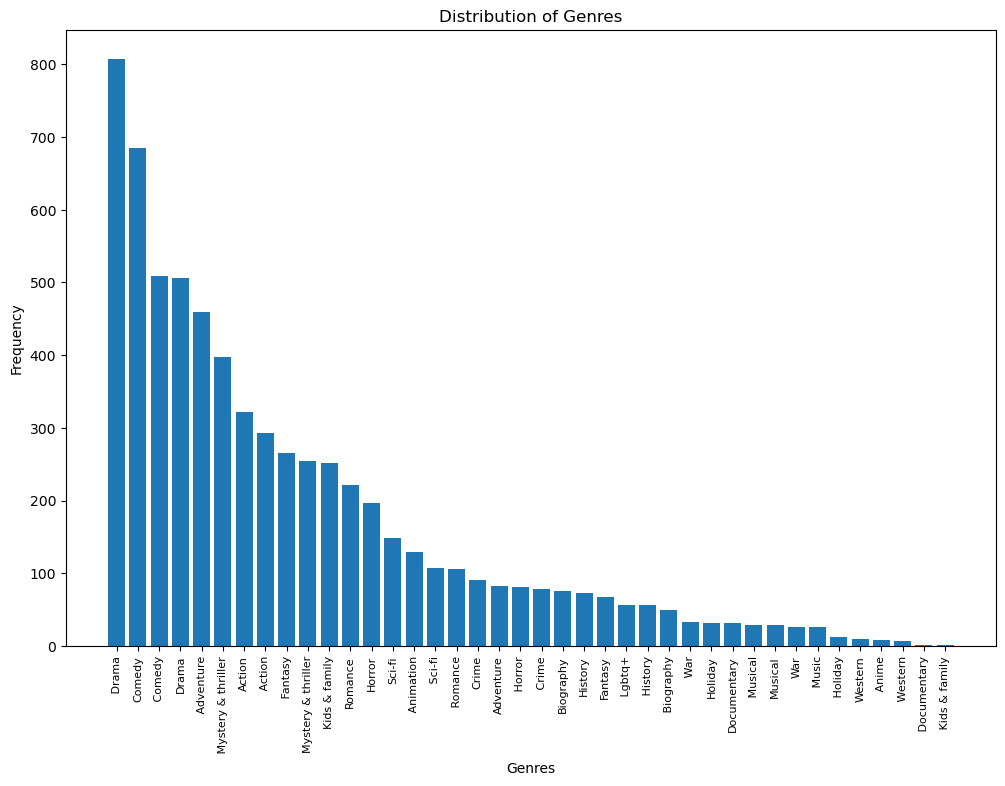

In [214]:
# Assuming that genres are separated by a comma in 'genre' column
# Create a series where each element is a list of genres for each movie
movies_df['genre'] = movies_df['genre'].astype(str)
genres = movies_df['genre'].str.split(',')

# Create an empty dictionary to hold the frequency count of each genre
genre_counts = {}

# Loop through the series and count the frequency of each genre
for genre_list in genres:
    for genre in genre_list:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

# Convert the dictionary to a DataFrame for easier plotting
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])

# Sort the DataFrame by Count
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)

# Plot the frequencies
plt.figure(figsize=(12,8))
plt.bar(genre_counts_df['Genre'], genre_counts_df['Count'])
plt.title('Distribution of Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=90, fontsize=8) # Rotate the labels and decrease the font size
plt.show()

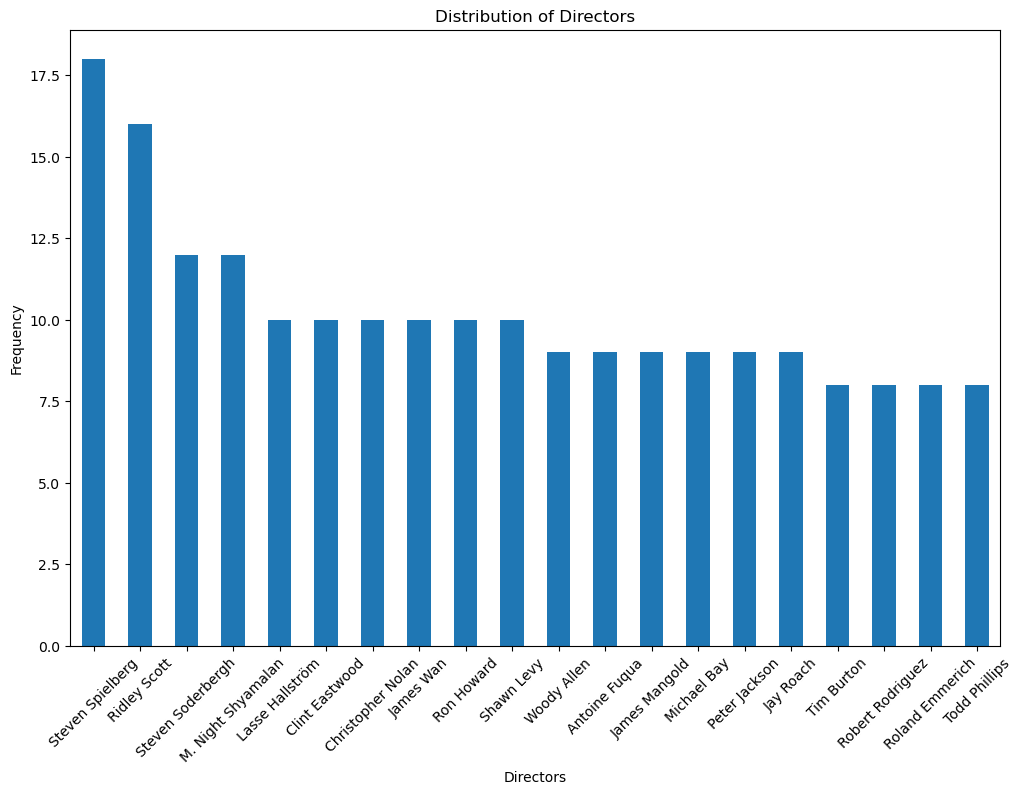

In [215]:
# Calculate director frequencies
director_counts = movies_df['director'].value_counts()

# Since there might be many directors, let's plot the top 20 directors
top_directors = director_counts[:20]

# Plot the frequencies
plt.figure(figsize=(12,8))
top_directors.plot(kind='bar')
plt.title('Distribution of Directors')
plt.xlabel('Directors')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

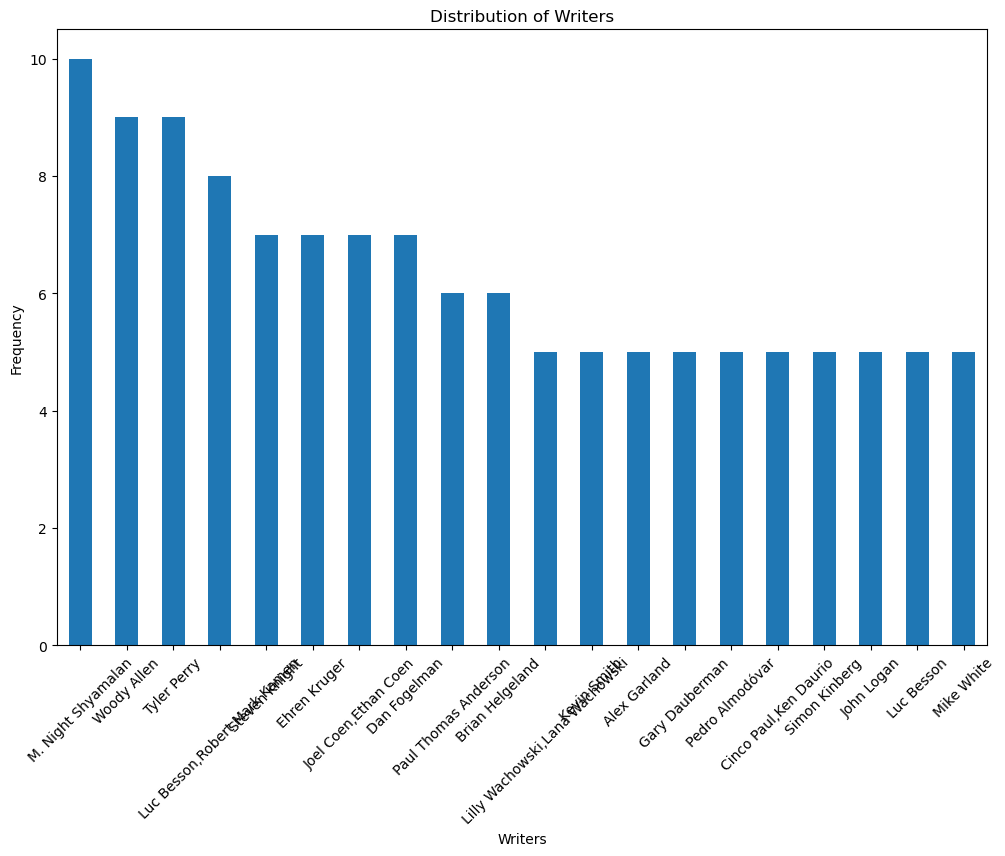

In [216]:
# Calculate writer frequencies
writer_counts = movies_df['writer'].value_counts()

# Since there might be many writers, let's plot the top 20 writers
top_writers = writer_counts[:20]

# Plot the frequencies
plt.figure(figsize=(12,8))
top_writers.plot(kind='bar')
plt.title('Distribution of Writers')
plt.xlabel('Writers')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

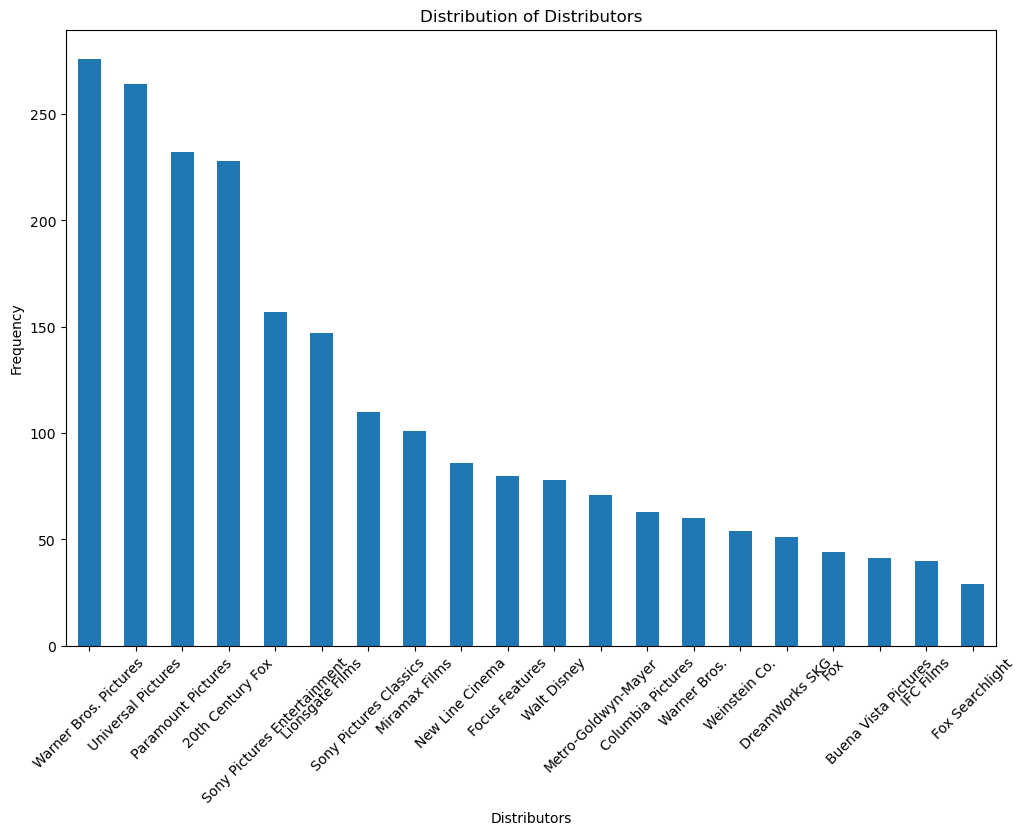

In [217]:
# Calculate distributor frequencies
distributor_counts = movies_df['distributor'].value_counts()

# Since there might be many distributors, let's plot the top 20 distributors
top_distributors = distributor_counts[:20]

# Plot the frequencies
plt.figure(figsize=(12,8))
top_distributors.plot(kind='bar')
plt.title('Distribution of Distributors')
plt.xlabel('Distributors')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

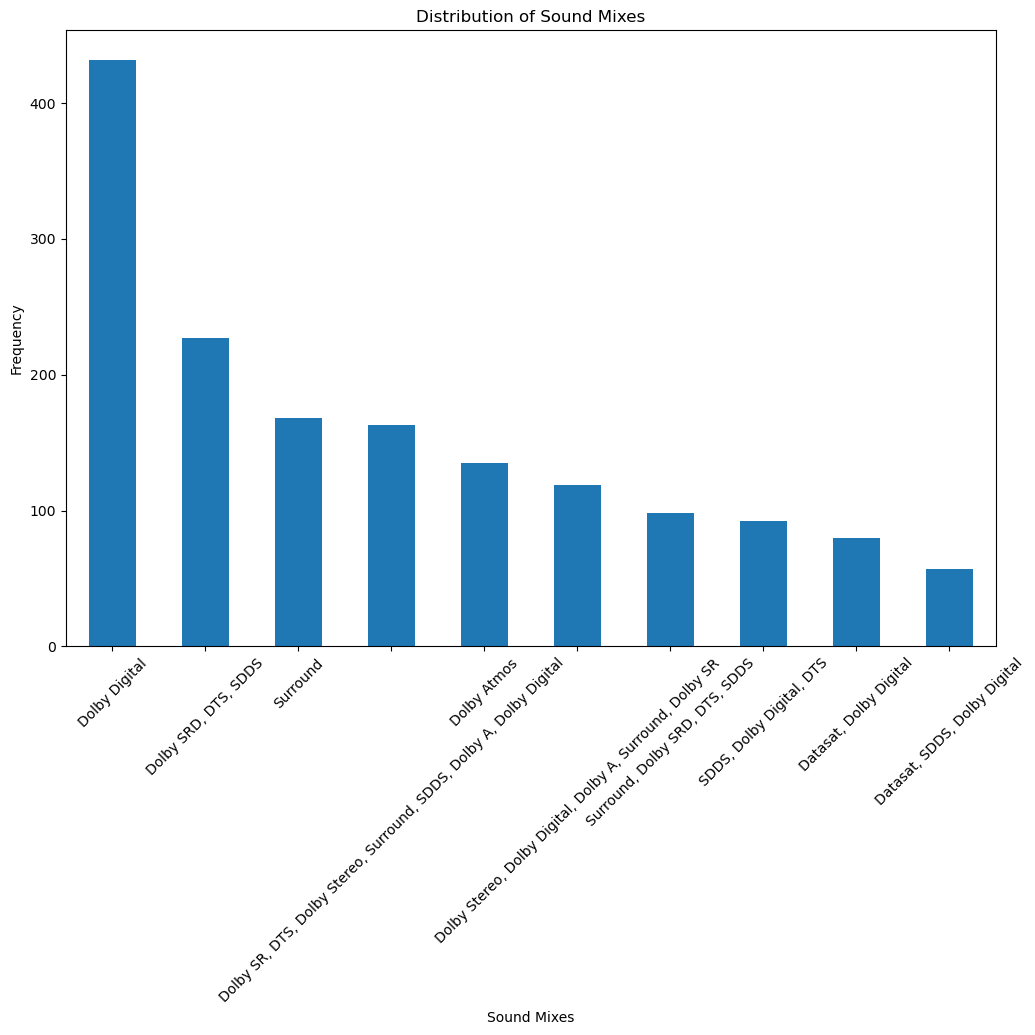

In [218]:
# Calculate sound mix frequencies
sound_mix_counts = movies_df['soundMix'].value_counts()

# Since there might be many sound mixes, let's plot the top 20 sound mixes
top_sound_mixes = sound_mix_counts[:10]

# Plot the frequencies
plt.figure(figsize=(12,8))
top_sound_mixes.plot(kind='bar')
plt.title('Distribution of Sound Mixes')
plt.xlabel('Sound Mixes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Bin Values: [0.0000e+00 8.5840e+07 1.7168e+08 2.5752e+08 3.4336e+08 4.2920e+08
 5.1504e+08 6.0088e+08 6.8672e+08 7.7256e+08 8.5840e+08]
Frequencies: [2568  329  113   48   27    7    3    6    2    1]


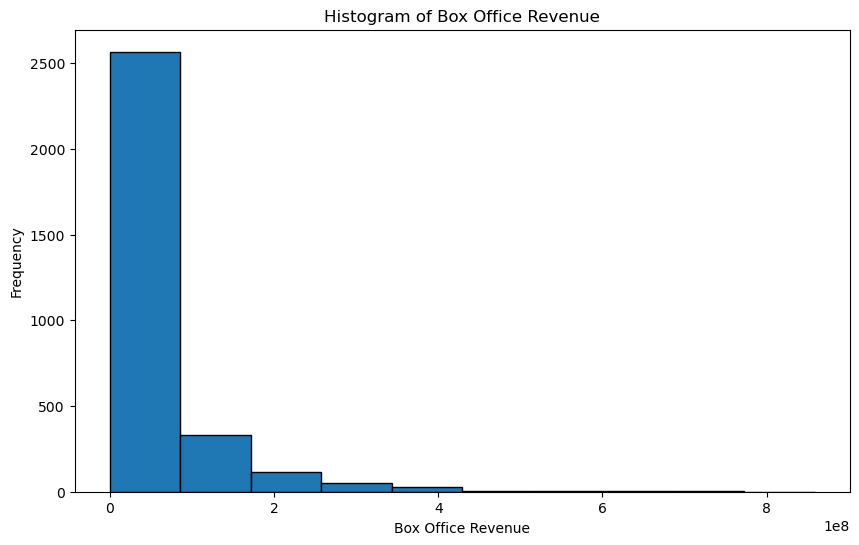

In [219]:
# Define a function to convert box office values to numerical format
def convert_box_office(value):
    if isinstance(value, float):
        return value
    value = str(value).replace('$', '')
    if 'K' in value:
        return float(re.sub(r'[^0-9.]', '', value)) * 1000
    elif 'M' in value:
        return float(re.sub(r'[^0-9.]', '', value)) * 1000000
    else:
        return 0

# Apply the conversion function to the 'boxOffice' column
movies_df['boxOffice'] = movies_df['boxOffice'].apply(convert_box_office)

# Replace null values in 'boxOffice' column with 0
movies_df['boxOffice'] = movies_df['boxOffice'].fillna(0)

# Generate histogram data
box_office_values = movies_df['boxOffice']
hist_values, bin_edges = np.histogram(box_office_values, bins=10)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(box_office_values, bins=10, edgecolor='black')
plt.xlabel('Box Office Revenue')
plt.ylabel('Frequency')
plt.title('Histogram of Box Office Revenue')

# Print the bin values and frequencies
print("Bin Values:", bin_edges)
print("Frequencies:", hist_values)

plt.show()

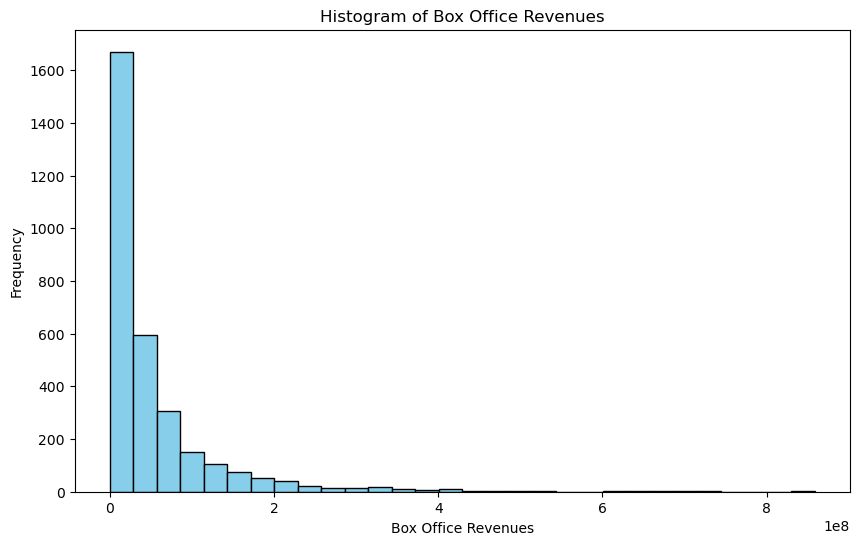

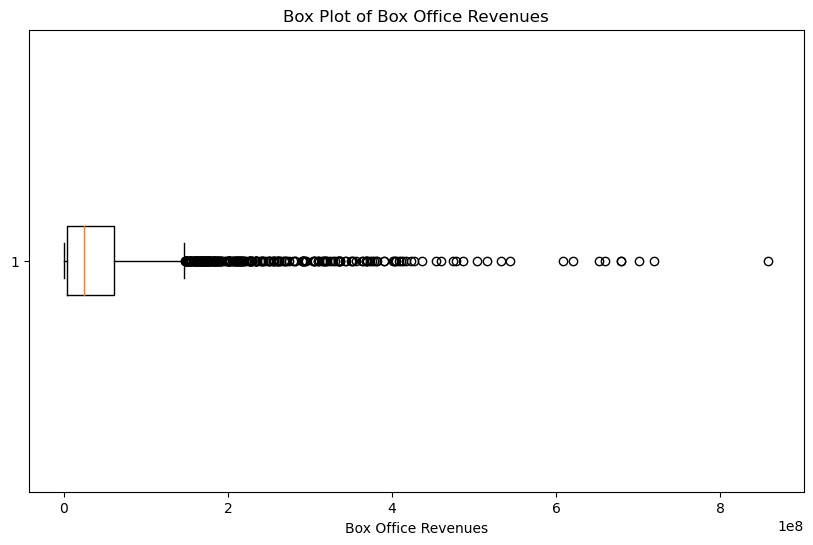

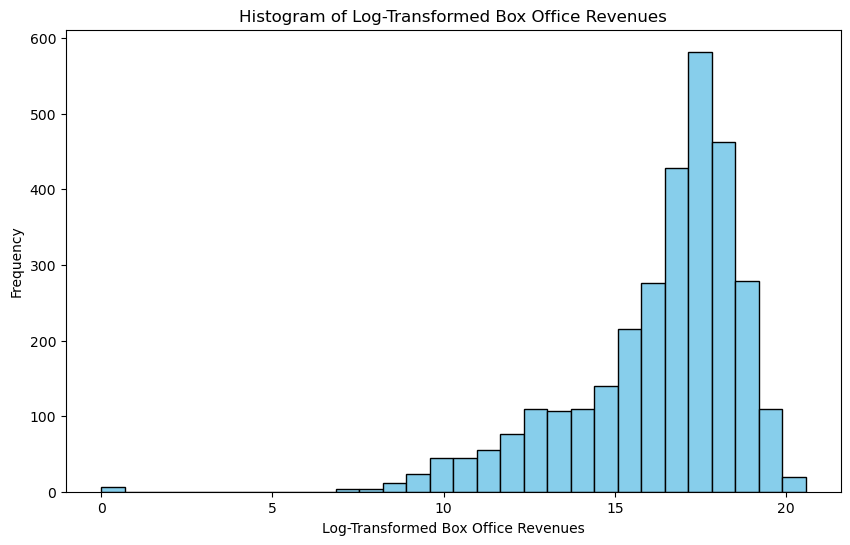

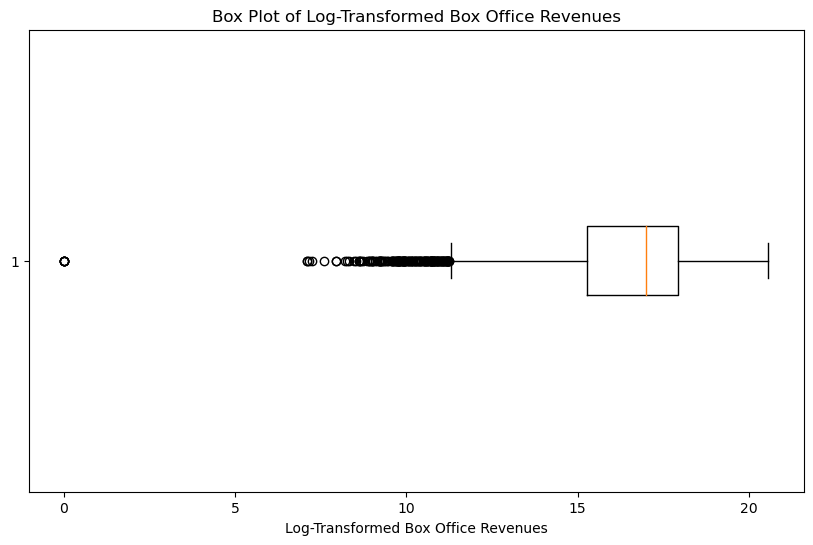

In [220]:
# Filter out rows where boxOffice is NaN
movies_df = movies_df[pd.to_numeric(movies_df['boxOffice'], errors='coerce').notnull()]
movies_df['boxOffice'] = movies_df['boxOffice'].astype(int)

# Plot the histogram of boxOffice
plt.figure(figsize=(10, 6))
plt.hist(movies_df['boxOffice'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Box Office Revenues')
plt.xlabel('Box Office Revenues')
plt.ylabel('Frequency')
plt.show()

# Plot the boxplot of boxOffice
plt.figure(figsize=(10, 6))
plt.boxplot(movies_df['boxOffice'], vert=False)
plt.title('Box Plot of Box Office Revenues')
plt.xlabel('Box Office Revenues')
plt.show()

# Apply log transformation
movies_df['log_boxOffice'] = np.log1p(movies_df['boxOffice'])

# Plot the histogram of log-transformed boxOffice
plt.figure(figsize=(10, 6))
plt.hist(movies_df['log_boxOffice'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Log-Transformed Box Office Revenues')
plt.xlabel('Log-Transformed Box Office Revenues')
plt.ylabel('Frequency')
plt.show()

# Plot the boxplot of log-transformed boxOffice
plt.figure(figsize=(10, 6))
plt.boxplot(movies_df['log_boxOffice'], vert=False)
plt.title('Box Plot of Log-Transformed Box Office Revenues')
plt.xlabel('Log-Transformed Box Office Revenues')
plt.show()

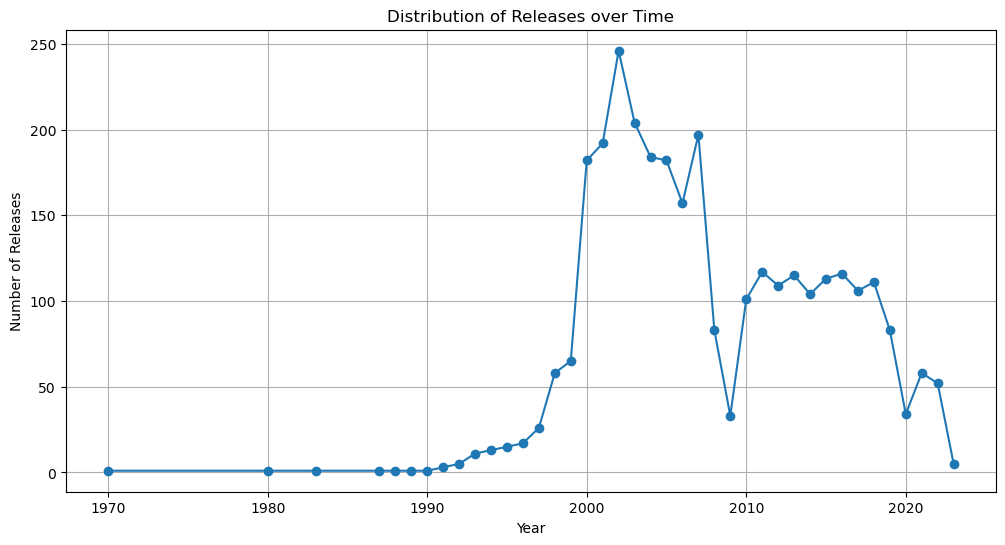

In [221]:
# create line plot for releaseDateTheaters
# Assuming you have the rotten tomatoes dataset loaded in a DataFrame called 'movies_df'

# Replace null values in the 'releaseDateTheaters' column with zero
movies_df['releaseDateTheaters'].fillna(0, inplace=True)

# Convert the 'releaseDateTheaters' column to datetime format
movies_df['releaseDateTheaters'] = pd.to_datetime(movies_df['releaseDateTheaters'], errors='coerce')

# Group the data by year and count the number of releases in each year
release_counts = movies_df['releaseDateTheaters'].dt.year.value_counts().sort_index()

# Plot the line chart
plt.figure(figsize=(12, 6))
release_counts.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Distribution of Releases over Time')
plt.grid(True)
plt.show()

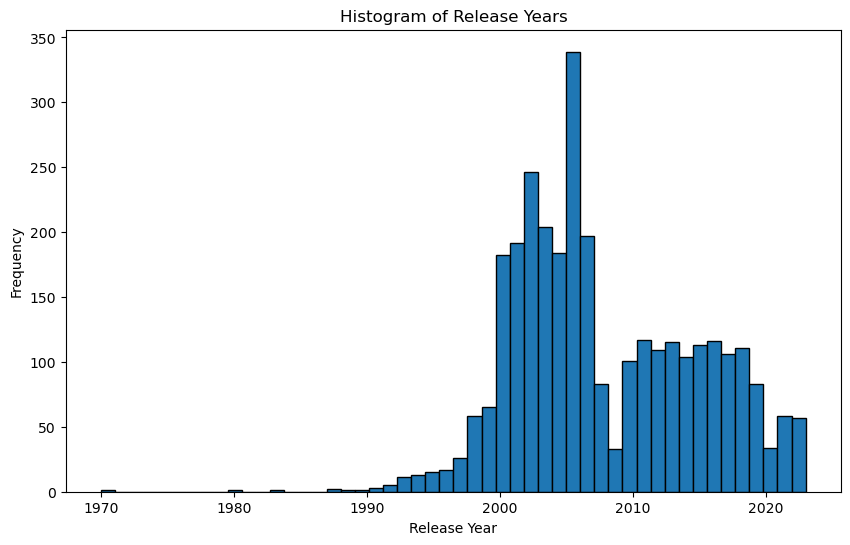

In [222]:
# create histogram for releaseDateTheaters
# Assuming you have the Rotten Tomatoes dataset loaded in a DataFrame called 'movies_df'

# Replace null values with zero
movies_df['releaseDateTheaters'].fillna(0, inplace=True)

# Convert the 'releaseDateTheaters' column to datetime format
movies_df['releaseDateTheaters'] = pd.to_datetime(movies_df['releaseDateTheaters'])

# Extract the release years
release_years = movies_df['releaseDateTheaters'].dt.year

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(release_years, bins=50, edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Histogram of Release Years')
plt.show()

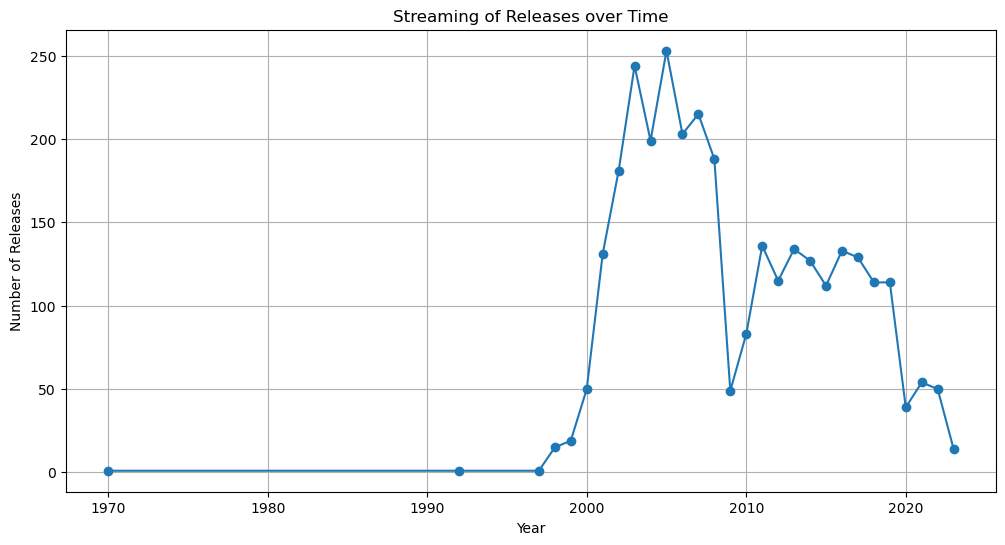

In [223]:
# create line plot for releaseDateStreaming
# Assuming you have the rotten tomatoes dataset loaded in a DataFrame called 'movies_df'

# Replace null values in the 'releaseDateStreaming' column with zero
movies_df['releaseDateStreaming'].fillna(0, inplace=True)

# Convert the 'releaseDateTheaters' column to datetime format
movies_df['releaseDateStreaming'] = pd.to_datetime(movies_df['releaseDateStreaming'], errors='coerce')

# Group the data by year and count the number of releases in each year
release_counts = movies_df['releaseDateStreaming'].dt.year.value_counts().sort_index()

# Plot the line chart
plt.figure(figsize=(12, 6))
release_counts.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Streaming of Releases over Time')
plt.grid(True)
plt.show()

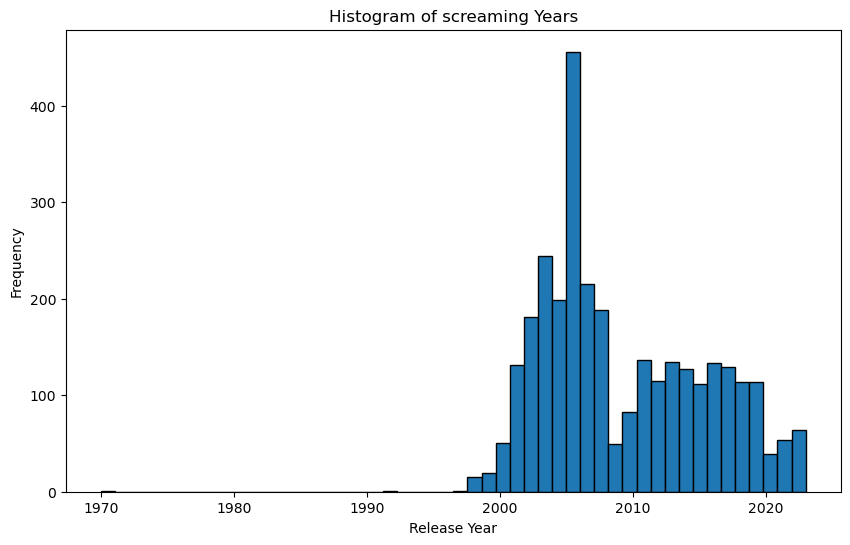

In [224]:
# create histogram for releaseDateStreaming
# Assuming you have the Rotten Tomatoes dataset loaded in a DataFrame called 'movies_df'

# Convert the 'releaseDateTheaters' column to datetime format
movies_df['releaseDateStreaming'] = pd.to_datetime(movies_df['releaseDateStreaming'])

# Extract the release years
release_years = movies_df['releaseDateStreaming'].dt.year

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(release_years, bins=50, edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Histogram of screaming Years')
plt.show()

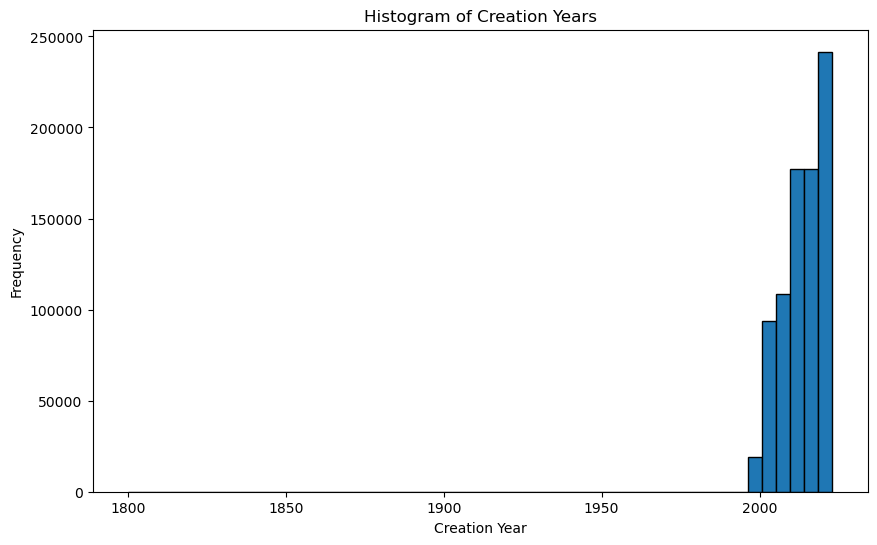

In [225]:
# create histogram for creationDate
# Assuming you have the Rotten Tomatoes Movie Reviews dataset loaded in a DataFrame called 'reviews_df'

# Convert the 'creationDate' column to datetime format
reviews_df['creationDate'] = pd.to_datetime(reviews_df['creationDate'])

# Extract the creation years
creation_years = reviews_df['creationDate'].dt.year

# Generate bins and frequencies
bins, frequencies = np.histogram(creation_years, bins=50)
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(creation_years, bins=50, edgecolor='black')
plt.xlabel('Creation Year')
plt.ylabel('Frequency')
plt.title('Histogram of Creation Years')
plt.show()

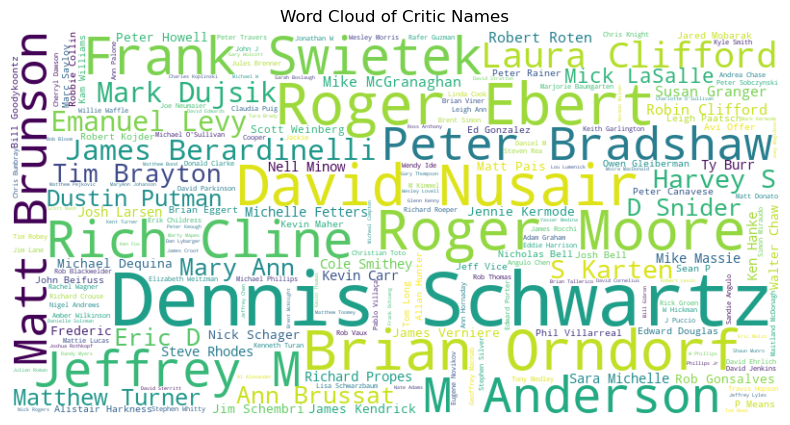

In [226]:
# Assuming you have the Rotten Tomatoes Movie Reviews dataset loaded in a DataFrame called 'reviews_df'

# Convert 'criticName' column to strings
reviews_df['criticName'] = reviews_df['criticName'].astype(str)

# Concatenate all the critic names into a single string
critic_name_text = ' '.join(reviews_df['criticName'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(critic_name_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Critic Names')
plt.show()

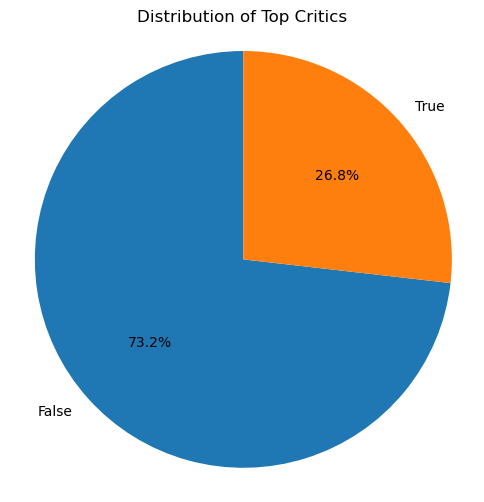

In [227]:
# Plot the pie chart for isTopCritic
# Assuming you have the Rotten Tomatoes Movie Reviews dataset loaded in a DataFrame called 'reviews_df'

# Count the occurrences of each value in the 'isTopCritic' column
top_critic_counts = reviews_df['isTopCritic'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(top_critic_counts, labels=top_critic_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Top Critics')
plt.axis('equal')
plt.show()

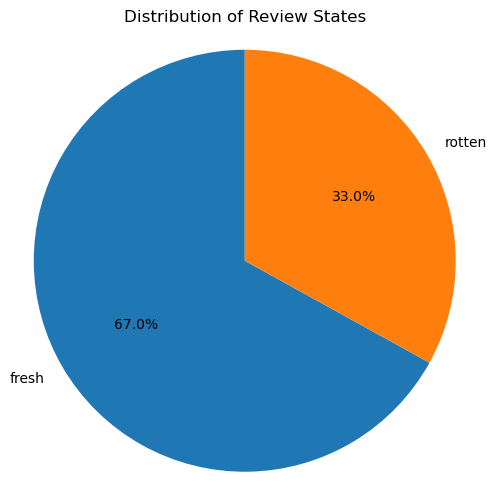

In [228]:
# Plot the pie chart for reviewState
# Assuming you have the Rotten Tomatoes Movie Reviews dataset loaded in a DataFrame called 'reviews_df'

# Count the occurrences of each value in the 'reviewState' column
review_state_counts = reviews_df['reviewState'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(review_state_counts, labels=review_state_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Review States')
plt.axis('equal')
plt.show()

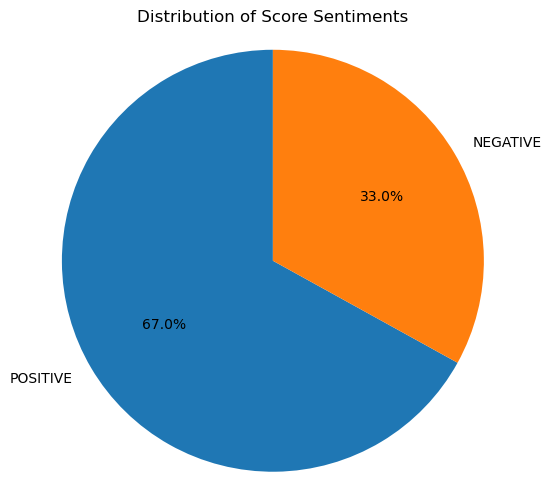

In [229]:
# Plot the pie chart for scoreSentiment
# Assuming you have the Rotten Tomatoes Movie Reviews dataset loaded in a DataFrame called 'reviews_df'

# Count the occurrences of each value in the 'scoreSentiment' column
score_sentiment_counts = reviews_df['scoreSentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(score_sentiment_counts, labels=score_sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Score Sentiments')
plt.axis('equal')
plt.show()

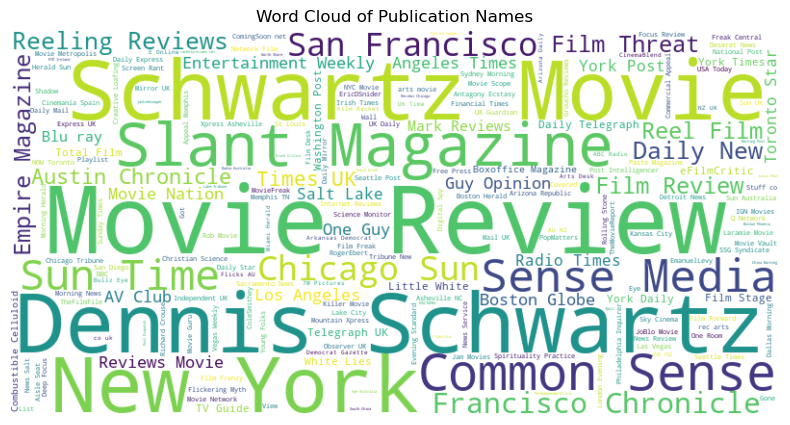

In [230]:
# Create word cloud for publicatioName
# Assuming you have the Rotten Tomatoes Movie Reviews dataset loaded in a DataFrame called 'reviews_df'

# Concatenate all the publication names into a single string
publication_text = ' '.join(reviews_df['publicatioName'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(publication_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Publication Names')
plt.show()

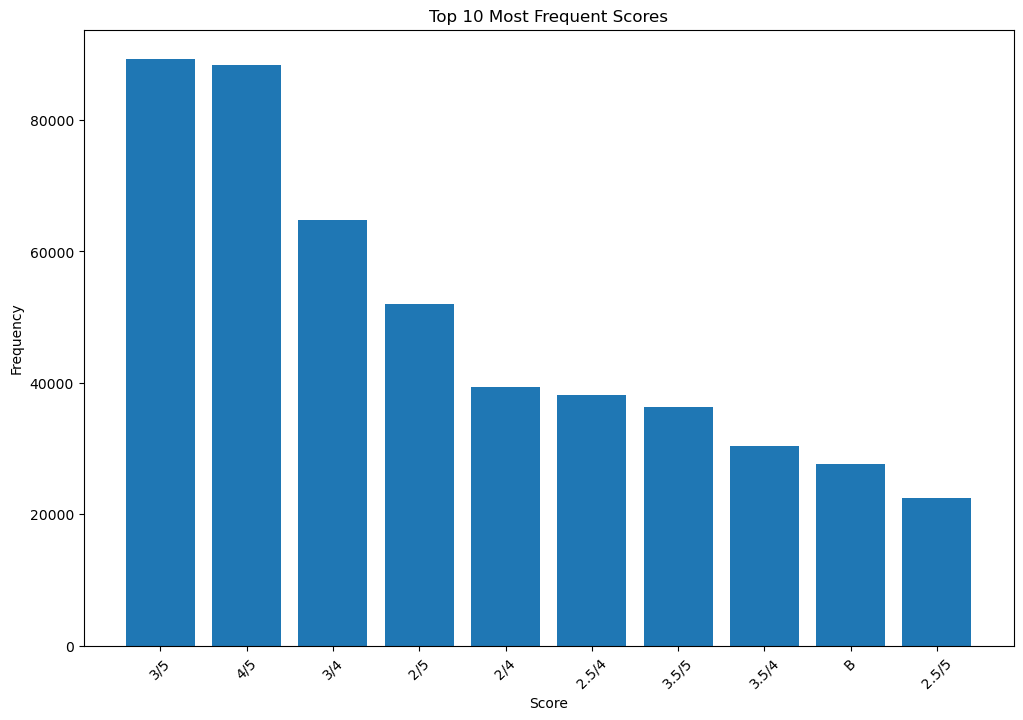

In [231]:
# Create bar chart of originalScore
# Assuming you have the dataset loaded in a DataFrame called 'reviews_df'

# Calculate the top 10 most frequent score categories
top_scores = reviews_df['originalScore'].value_counts().nlargest(10)

# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_scores.index, top_scores.values)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Scores')
plt.xticks(rotation=45)
plt.show()

In [232]:
# Calculate correlation matrix
corr_matrix = movies_df.corr()

# Print the correlation matrix
print(corr_matrix)

                audienceScore  tomatoMeter  runtimeMinutes  boxOffice  \
audienceScore        1.000000     0.686721        0.347317   0.202352   
tomatoMeter          0.686721     1.000000        0.300596   0.186563   
runtimeMinutes       0.347317     0.300596        1.000000   0.326352   
boxOffice            0.202352     0.186563        0.326352   1.000000   
log_boxOffice        0.087616     0.016809        0.210314   0.585418   

                log_boxOffice  
audienceScore        0.087616  
tomatoMeter          0.016809  
runtimeMinutes       0.210314  
boxOffice            0.585418  
log_boxOffice        1.000000  


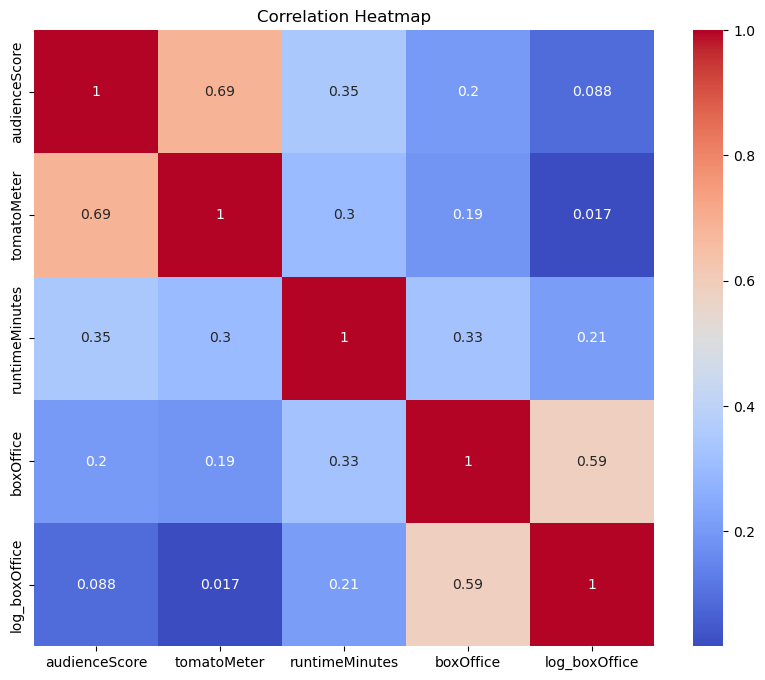

In [233]:
# Draw the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

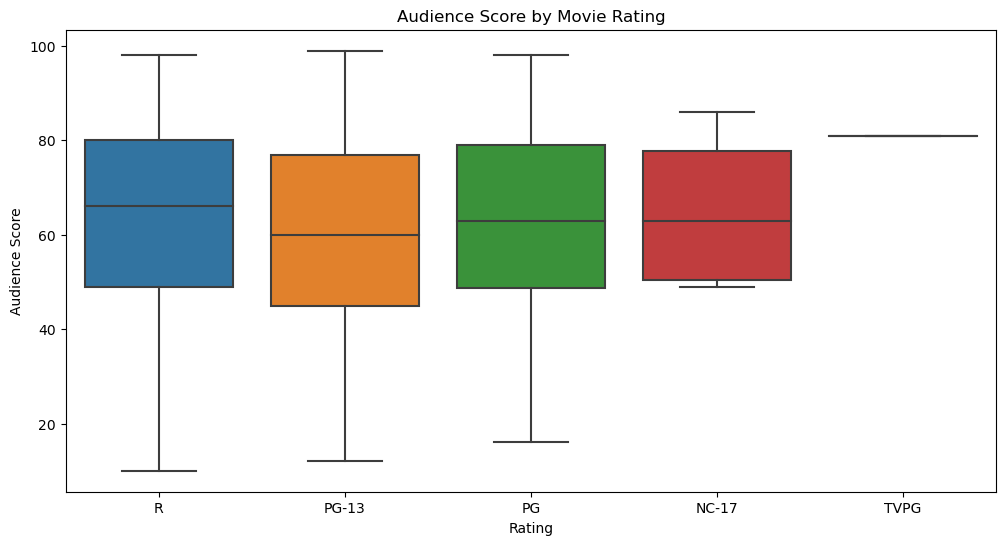

In [234]:
plt.figure(figsize=(12,6))
sns.boxplot(x='rating', y='audienceScore', data=movies_df)
plt.title('Audience Score by Movie Rating')
plt.xlabel('Rating')
plt.ylabel('Audience Score')
plt.show()

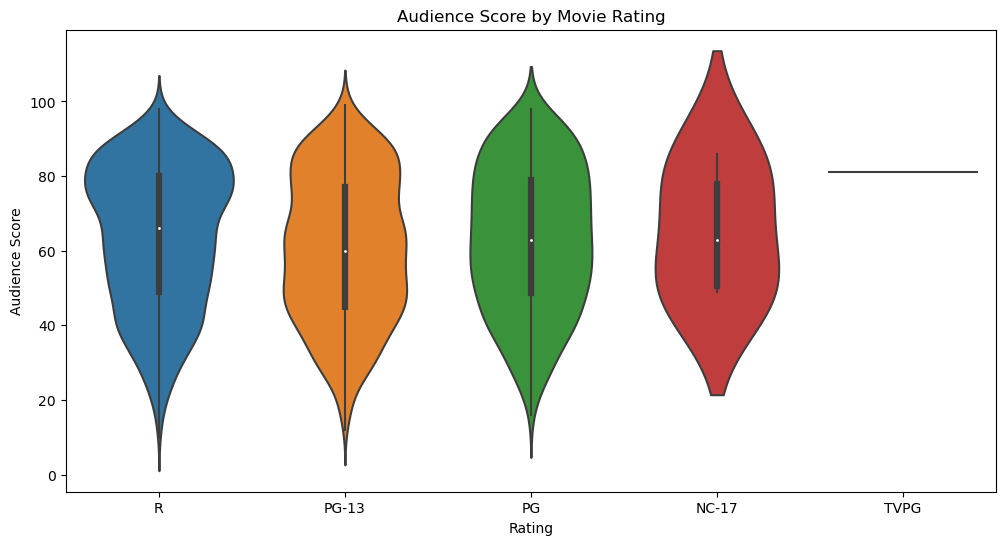

In [235]:
plt.figure(figsize=(12,6))
sns.violinplot(x='rating', y='audienceScore', data=movies_df)
plt.title('Audience Score by Movie Rating')
plt.xlabel('Rating')
plt.ylabel('Audience Score')
plt.show()

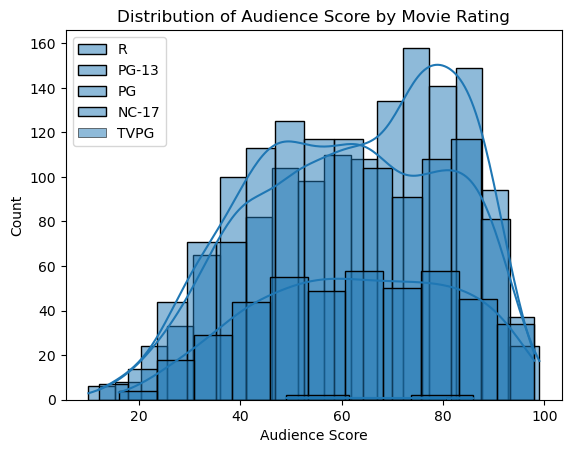

In [236]:
# Plotting separate histograms for each movie rating
for rating in movies_df['rating'].unique():
    sns.histplot(movies_df[movies_df['rating'] == rating]['audienceScore'], kde=True, label=rating)
plt.title('Distribution of Audience Score by Movie Rating')
plt.xlabel('Audience Score')
plt.legend()
plt.show()

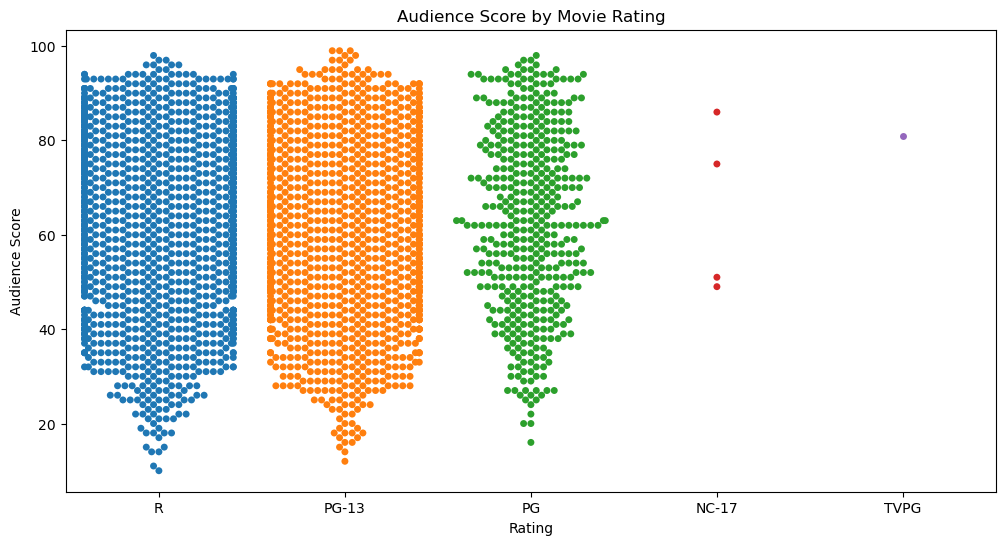

In [237]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='rating', y='audienceScore', data=movies_df)
plt.title('Audience Score by Movie Rating')
plt.xlabel('Rating')
plt.ylabel('Audience Score')
plt.show()

In [238]:
from scipy.stats import f_oneway

# Create a group for each rating category
groups = [group['audienceScore'].dropna() for name, group in movies_df.groupby('rating')]

# Perform one-way ANOVA
f_val, p_val = f_oneway(*groups)

# Print the F-value and p-value
print('F-value:', f_val)
print('p-value:', p_val)

F-value: 4.205190254212122
p-value: 0.002132072140342283


In [239]:
# Create a group for each rating category
groups = [group['runtimeMinutes'].dropna() for name, group in movies_df.groupby('rating')]

# Perform one-way ANOVA
f_val, p_val = f_oneway(*groups)

# Print the F-value and p-value
print('F-value:', f_val)
print('p-value:', p_val)

F-value: 25.364727826344406
p-value: 1.0506639239969584e-20


[Text(0, 0, '547252'), Text(0, 0, '269931')]

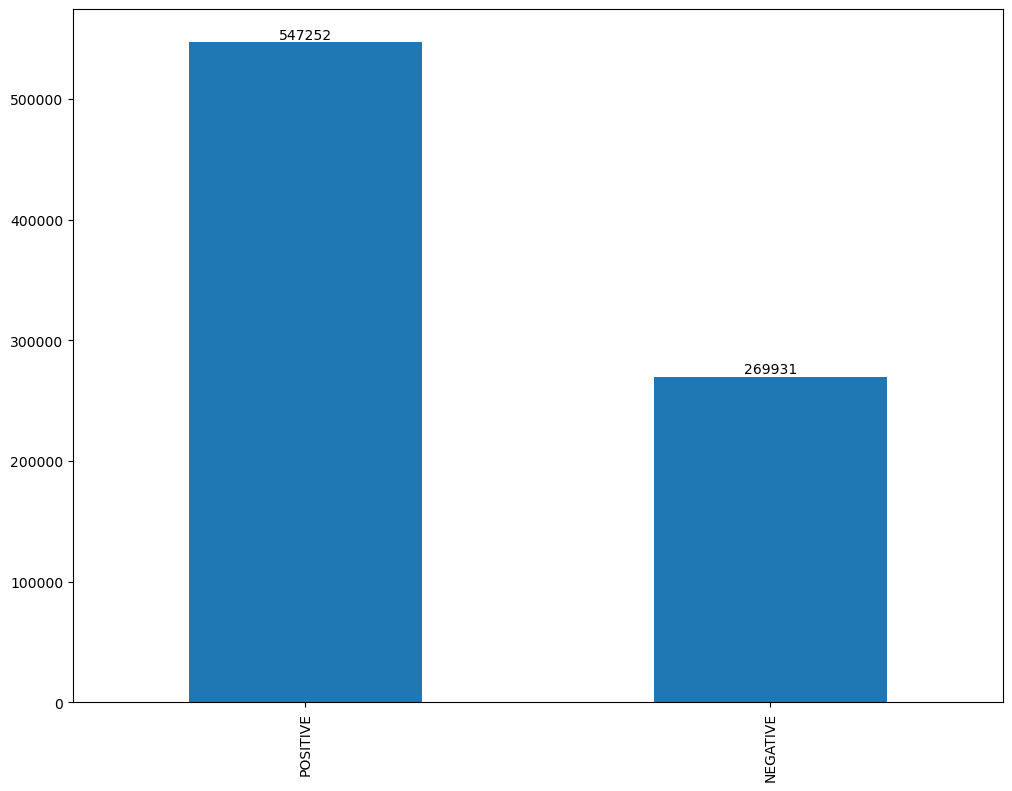

In [240]:
data = reviews_df['scoreSentiment'].value_counts().plot(kind='bar', figsize=(12,9))
data.bar_label(data.containers[0])

In [241]:
#Number of directors in each movie
movies_df['num_directors'] = movies_df['director'].apply(lambda x : len(x.split(',')))
#Movie with the highest number of directors
movies_df[movies_df["num_directors"] == movies_df["num_directors"].max()]

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix,log_boxOffice,num_directors
105710,movie_43,Movie 43,24.0,4.0,R,"['Graphic Nudity', 'Dialogue', 'Language', 'So...",2013-01-25,2013-06-18,94.0,Comedy,English,"Steven Brill,Peter Farrelly,Will Graham,Steve ...","Will Carlough,Tobias Carlson,Jacob Fleisher,Pa...",8800000,Relativity Media,"Datasat, Dolby Digital",15.990262,12


In [242]:
#Number of writers in each movie
movies_df['num_writers'] = movies_df['writer'].apply(lambda x : len(x.split(',')))
#Movie with the highest number of writers
movies_df[movies_df["num_writers"] == movies_df["num_writers"].max()]

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix,log_boxOffice,num_directors,num_writers
32673,simpsons_movie,The Simpsons Movie,77.0,87.0,PG-13,['Irreverent Humor Throughout'],2007-07-27,2007-12-18,86.0,"Comedy, Animation",English,David Silverman,"James L. Brooks,Matt Groening,Al Jean,Mike Scu...",183100000,20th Century Fox,"Dolby SRD, DTS, SDDS",19.025543,1,11


In [243]:
print(f'Movie with the highest runtime: \n{movies_df[movies_df["runtimeMinutes"] == movies_df["runtimeMinutes"].max()][["runtimeMinutes", "title"]]}')
print(f'Movie with the lowest runtime: \n{movies_df[movies_df["runtimeMinutes"] == movies_df["runtimeMinutes"].min()][["runtimeMinutes", "title"]]}')

Movie with the highest runtime: 
       runtimeMinutes                              title
16875           223.0                  Gods and Generals
47329           223.0  Lagaan: Once Upon a Time in India
Movie with the lowest runtime: 
       runtimeMinutes                      title
22213            74.0  The Powerpuff Girls Movie


R        1451
PG-13    1204
PG        444
NC-17       4
TVPG        1
Name: rating, dtype: int64


Text(0.5, 1.0, 'Content Ratings Counts')

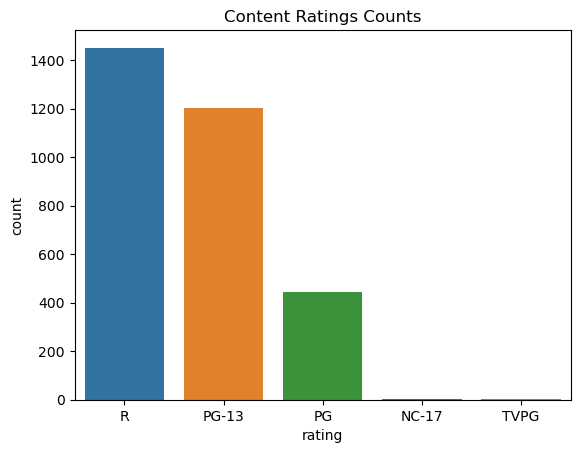

In [244]:
print(movies_df['rating'].value_counts())
sns.countplot(data=movies_df, x='rating')
plt.title('Content Ratings Counts')

Text(0, 0.5, 'Counts')

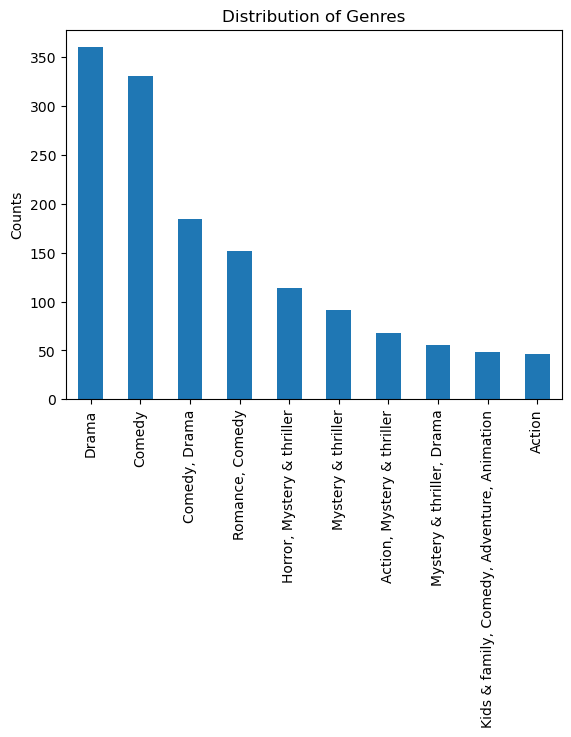

In [245]:
movies_df['genre'].value_counts()[:10].plot(kind='bar')
plt.title('Distribution of Genres')
plt.ylabel('Counts')

Majority of the Movie is Drama based.

In [246]:
print(movies_df[['tomatoMeter','audienceScore']])

        tomatoMeter  audienceScore
88             95.0           87.0
146            15.0           40.0
151            21.0           25.0
273            91.0           93.0
308            71.0           69.0
...             ...            ...
143000          6.0           58.0
143008         49.0           77.0
143012         50.0           81.0
143025         22.0           44.0
143250         25.0           47.0

[3104 rows x 2 columns]


In [247]:
#merging two df with df.merge method and using id column as foreign key (common in both dataset)
merged_df = movies_df.merge(reviews_df,on="id")

In [248]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271704 entries, 0 to 271703
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    271704 non-null  object        
 1   title                 271704 non-null  object        
 2   audienceScore         271704 non-null  float64       
 3   tomatoMeter           271704 non-null  float64       
 4   rating                271704 non-null  object        
 5   ratingContents        271704 non-null  object        
 6   releaseDateTheaters   271704 non-null  datetime64[ns]
 7   releaseDateStreaming  271704 non-null  datetime64[ns]
 8   runtimeMinutes        271704 non-null  float64       
 9   genre                 271704 non-null  object        
 10  originalLanguage      271704 non-null  object        
 11  director              271704 non-null  object        
 12  writer                271704 non-null  object        
 13 

In [249]:
#Sentiment score generated out of the user's reviews, we can use these sentiment score as a defining criteria
#for either to consider the very movie in recommendation or no.
for sentiment in merged_df.groupby("id"):
  movie_name = sentiment[1].id.values.tolist()[0]
  #lets create a dictionary of sentiment score
  score_dict = sentiment[1].scoreSentiment.value_counts().to_dict()
  #we will create a new column as "to_include" with Binary values
  #check if only negative reviews are there
  if score_dict.get('NEGATIVE') and not score_dict.get('POSITIVE'):
    print(f"negative score - {movie_name}")
    #set to_include for the very movie as No
    merged_df.loc[merged_df['id'] == sentiment[1].id.values.tolist()[0], 'to_include'] = "No"
  #check if only positive reviews are there
  elif score_dict.get('POSITIVE') and not score_dict.get('NEGATIVE'):
    print(f"POSITIVE score - {movie_name}")
    #set to_include for the very movie as Yes
    merged_df.loc[merged_df['id'] == sentiment[1].id.values.tolist()[0], 'to_include'] = "Yes"
  #check if negative reviews are less than positive reviews
  elif score_dict.get('NEGATIVE') < score_dict.get('POSITIVE'):
    print(f"positive score - {movie_name}")
    #set to_include for the very movie as Yes
    merged_df.loc[merged_df['id'] == sentiment[1].id.values.tolist()[0], 'to_include'] = "Yes"

negative score - 10005409-dirty_deeds
positive score - 10005499-oliver_twist
positive score - 10007415-amazing_grace
positive score - 10008502-christmas_carol
positive score - 10008507-deep_water
positive score - 10009420-quid_pro_quo
positive score - 10010334-leaves_of_grass
positive score - 10011582-tron_legacy
positive score - 10012042-going_the_distance
positive score - 10012141-kids_are_all_right
POSITIVE score - 1029042-henry_v
positive score - 102_not_out
POSITIVE score - 1040322-of_mice_and_men
POSITIVE score - 1040484-wind
positive score - 1062983-smoke
positive score - 1065684-braveheart
negative score - 1071413-last_dance
positive score - 1071769-cold_comfort_farm
positive score - 1071806-independence_day
POSITIVE score - 1072833-alaska
positive score - 1073595-sleepers
positive score - 1074316-scream
positive score - 1075777-private_parts
positive score - 1075984-iron_monkey
positive score - 1081200-great_expectations
positive score - 1082855-twilight
positive score - 10834

In [250]:
merged_df.columns

Index(['id', 'title', 'audienceScore', 'tomatoMeter', 'rating',
       'ratingContents', 'releaseDateTheaters', 'releaseDateStreaming',
       'runtimeMinutes', 'genre', 'originalLanguage', 'director', 'writer',
       'boxOffice', 'distributor', 'soundMix', 'log_boxOffice',
       'num_directors', 'num_writers', 'reviewId', 'creationDate',
       'criticName', 'isTopCritic', 'originalScore', 'reviewState',
       'publicatioName', 'reviewText', 'scoreSentiment', 'reviewUrl',
       'duration', 'to_include'],
      dtype='object')

In [251]:
#lets see how many movies we can include for recommendation which has more positive sentiment score than negative
merged_df.loc[merged_df["to_include"].eq("Yes"),"id"].nunique()

1679

# We can now perform data preprocessing and start modeling

In [252]:
#combine data
# Combine the datasets based on 'id'
combined_data = pd.merge(movies_df, reviews_df, on='id')

# Display the combined data
combined_data.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,...,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl,duration
0,monsoon_wedding,Monsoon Wedding,87.0,95.0,R,"['Some Sex Related Dialogue', 'Language']",2002-02-22,2002-09-24,100.0,"Comedy, Drama",...,2022-04-08,Jimmy Cage,False,9/10,fresh,Jimmy Cage Movie Reviews (YouTube),MONSOON WEDDING is a wonderful film in which m...,POSITIVE,https://youtu.be/m8of8Xpd1UA,13.3
1,monsoon_wedding,Monsoon Wedding,87.0,95.0,R,"['Some Sex Related Dialogue', 'Language']",2002-02-22,2002-09-24,100.0,"Comedy, Drama",...,2022-02-26,Brian Eggert,False,4/4,fresh,Deep Focus Review,A celebration of life that acknowledges how fa...,POSITIVE,https://deepfocusreview.com/reviews/monsoon-we...,14.0
2,monsoon_wedding,Monsoon Wedding,87.0,95.0,R,"['Some Sex Related Dialogue', 'Language']",2002-02-22,2002-09-24,100.0,"Comedy, Drama",...,2010-09-19,Nick Rogers,False,4/4,fresh,The Film Yap,Not content to merely direct traffic of inters...,POSITIVE,http://www.thefilmyap.com/2010/07/20/heroes-of...,239.6
3,monsoon_wedding,Monsoon Wedding,87.0,95.0,R,"['Some Sex Related Dialogue', 'Language']",2002-02-22,2002-09-24,100.0,"Comedy, Drama",...,2010-03-02,John A. Nesbit,False,B,fresh,Old School Reviews,... among the most universal of films,POSITIVE,http://oldschoolreviews.com/rev_2000/monsoon_w...,259.0
4,monsoon_wedding,Monsoon Wedding,87.0,95.0,R,"['Some Sex Related Dialogue', 'Language']",2002-02-22,2002-09-24,100.0,"Comedy, Drama",...,2009-12-22,Chuck Bowen,True,3/4,fresh,Slant Magazine,"A big, galloping party movie in which the part...",POSITIVE,http://www.slantmagazine.com/film/review/monso...,160.7


                audienceScore  tomatoMeter  runtimeMinutes  boxOffice  \
audienceScore        1.000000     0.686721        0.347317   0.202352   
tomatoMeter          0.686721     1.000000        0.300596   0.186563   
runtimeMinutes       0.347317     0.300596        1.000000   0.326352   
boxOffice            0.202352     0.186563        0.326352   1.000000   
log_boxOffice        0.087616     0.016809        0.210314   0.585418   
num_directors       -0.012531     0.016335       -0.079098   0.063169   
num_writers         -0.032316    -0.054404        0.005470   0.151128   

                log_boxOffice  num_directors  num_writers  
audienceScore        0.087616      -0.012531    -0.032316  
tomatoMeter          0.016809       0.016335    -0.054404  
runtimeMinutes       0.210314      -0.079098     0.005470  
boxOffice            0.585418       0.063169     0.151128  
log_boxOffice        1.000000       0.045627     0.173232  
num_directors        0.045627       1.000000     0.1358

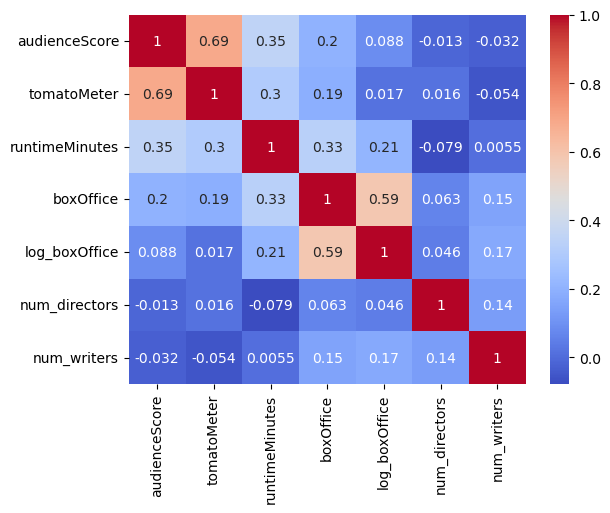

In [253]:
# Creating the correlation matrix of the dataset
corr_matrix = movies_df.corr()
print(corr_matrix)

# Create the heatmap using the `heatmap` function of Seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Display the heatmap using the `show` method of the `pyplot` module from matplotlib.
plt.show()

In [254]:
# Drop unwanted columns
columns_to_drop = ['reviewId', 'creationDate', 'reviewUrl']  # Specify the columns to drop
combined_data = combined_data.drop(columns_to_drop, axis=1)  # Drop the specified columns

In [255]:
combined_data.isnull().sum()

id                      0
title                   0
audienceScore           0
tomatoMeter             0
rating                  0
ratingContents          0
releaseDateTheaters     0
releaseDateStreaming    0
runtimeMinutes          0
genre                   0
originalLanguage        0
director                0
writer                  0
boxOffice               0
distributor             0
soundMix                0
log_boxOffice           0
num_directors           0
num_writers             0
criticName              0
isTopCritic             0
originalScore           0
reviewState             0
publicatioName          0
reviewText              0
scoreSentiment          0
duration                0
dtype: int64

In [256]:
combined_data.duplicated().sum()

0

In [257]:
# Function to identify the outliers
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)

In [258]:
print(len(findoutliers(combined_data.audienceScore)))

0


In [259]:
print(len(findoutliers(combined_data.tomatoMeter)))

0


In [260]:
print(len(findoutliers(combined_data.runtimeMinutes)))

4405


In [261]:
#removing outliers in 'runtimeMinutes'
Q1 = combined_data['runtimeMinutes'].quantile(0.25)
Q3 = combined_data['runtimeMinutes'].quantile(0.75)
IQR = Q3 - Q1

In [262]:
lower_bound = Q1 - 1.5 * IQR+10
upper_bound = Q3 + 1.5 * IQR-10

In [263]:
combined_data = combined_data[(combined_data['runtimeMinutes'] >= lower_bound) & (combined_data['runtimeMinutes'] <= upper_bound)]

<AxesSubplot:xlabel='runtimeMinutes'>

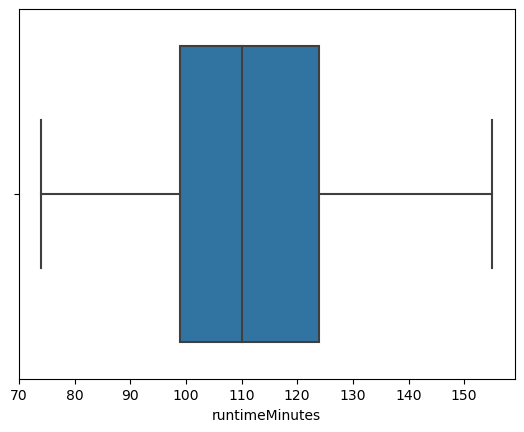

In [264]:
sns.boxplot(x=combined_data['runtimeMinutes'])

In [265]:
print(len(findoutliers(combined_data.runtimeMinutes)))

0


# Variable transformation

In [266]:
#Label-Encoder encoding for categorical variables

from sklearn.preprocessing import LabelEncoder

# Create the encoder
encoder = LabelEncoder()

In [267]:
#genre column

# Fit and transform the encoder on 'genre' column
combined_data['genre'] = encoder.fit_transform(combined_data['genre'])
combined_data['genre']

0         122
1         122
2         122
3         122
4         122
         ... 
271699    248
271700    248
271701    248
271702    248
271703    248
Name: genre, Length: 262255, dtype: int64

In [268]:
#originallanguage column 

combined_data['originalLanguage'] = encoder.fit_transform(combined_data['originalLanguage'])
combined_data['originalLanguage']

0         7
1         7
2         7
3         7
4         7
         ..
271699    7
271700    7
271701    7
271702    7
271703    7
Name: originalLanguage, Length: 262255, dtype: int64

In [269]:
#director column

combined_data['director'] = encoder.fit_transform(combined_data['director'])
combined_data['director']

0         1070
1         1070
2         1070
3         1070
4         1070
          ... 
271699     807
271700     807
271701     807
271702     807
271703     807
Name: director, Length: 262255, dtype: int64

In [270]:
#writer column

combined_data['writer'] = encoder.fit_transform(combined_data['writer'])
combined_data['writer']

0         2124
1         2124
2         2124
3         2124
4         2124
          ... 
271699    1636
271700    1636
271701    1636
271702    1636
271703    1636
Name: writer, Length: 262255, dtype: int64

In [271]:
#distributor column

combined_data['distributor'] = encoder.fit_transform(combined_data['distributor'])
combined_data['distributor']

0         292
1         292
2         292
3         292
4         292
         ... 
271699    203
271700    203
271701    203
271702    203
271703    203
Name: distributor, Length: 262255, dtype: int64

In [272]:
#soundmix column

combined_data['soundMix'] = encoder.fit_transform(combined_data['soundMix'])
combined_data['soundMix']

0         184
1         184
2         184
3         184
4         184
         ... 
271699     31
271700     31
271701     31
271702     31
271703     31
Name: soundMix, Length: 262255, dtype: int64

In [273]:
#originalscore column

combined_data['originalScore'] = encoder.fit_transform(combined_data['originalScore'])
combined_data['originalScore']

0         758
1         431
2         431
3         784
4         333
         ... 
271699    197
271700    505
271701    333
271702    101
271703    822
Name: originalScore, Length: 262255, dtype: int64

In [274]:
#rating column

combined_data['rating'] = encoder.fit_transform(combined_data['rating'])
combined_data['rating']

0         3
1         3
2         3
3         3
4         3
         ..
271699    2
271700    2
271701    2
271702    2
271703    2
Name: rating, Length: 262255, dtype: int64

In [275]:
#criticName column

combined_data['criticName'] = encoder.fit_transform(combined_data['criticName'])
combined_data['criticName']

0         2333
1          668
2         3759
3         2392
4          997
          ... 
271699    2851
271700     902
271701     918
271702    3355
271703    2216
Name: criticName, Length: 262255, dtype: int64

In [276]:
#isTopCritic column

combined_data['isTopCritic'] = encoder.fit_transform(combined_data['isTopCritic'])
combined_data['isTopCritic']

0         0
1         0
2         0
3         0
4         1
         ..
271699    1
271700    0
271701    0
271702    0
271703    1
Name: isTopCritic, Length: 262255, dtype: int64

In [277]:
#reviewState

combined_data['reviewState'] = encoder.fit_transform(combined_data['reviewState'])
combined_data['reviewState']

0         0
1         0
2         0
3         0
4         0
         ..
271699    1
271700    1
271701    0
271702    1
271703    1
Name: reviewState, Length: 262255, dtype: int64

In [278]:
#publicationName column

combined_data['publicatioName'] = encoder.fit_transform(combined_data['publicatioName'])
combined_data['publicatioName']

0          745
1          388
2         1375
3         1025
4         1258
          ... 
271699      89
271700     746
271701    1283
271702    1126
271703     453
Name: publicatioName, Length: 262255, dtype: int64

In [279]:
#scoreSentiment column

combined_data['scoreSentiment'] = encoder.fit_transform(combined_data['scoreSentiment'])
combined_data['scoreSentiment']

0         1
1         1
2         1
3         1
4         1
         ..
271699    0
271700    0
271701    1
271702    0
271703    0
Name: scoreSentiment, Length: 262255, dtype: int64

In [280]:
# Importing necessary libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Creating MinMaxScaler (Normalization)
min_max_scaler = MinMaxScaler()

In [281]:
#audianceScore column

# Applying MinMaxScaler on 'audienceScore'
combined_data['audienceScore'] = min_max_scaler.fit_transform(combined_data[['audienceScore']])

In [282]:
#tomatoMeter column

combined_data['tomatoMeter'] = min_max_scaler.fit_transform(combined_data[['tomatoMeter']])

In [283]:
#runtimeMinutes column

combined_data['runtimeMinutes'] = min_max_scaler.fit_transform(combined_data[['runtimeMinutes']])

In [284]:
#log_BoxOffice column

combined_data['log_boxOffice'] = min_max_scaler.fit_transform(combined_data[['log_boxOffice']])

In [285]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100)

# Fit and transform the vectorizer on 'reviewText'
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_data['reviewText'])

In [286]:
#combined_data.drop('reviewText', axis=1, inplace=True)

In [287]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262255 entries, 0 to 271703
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    262255 non-null  object        
 1   title                 262255 non-null  object        
 2   audienceScore         262255 non-null  float64       
 3   tomatoMeter           262255 non-null  float64       
 4   rating                262255 non-null  int64         
 5   ratingContents        262255 non-null  object        
 6   releaseDateTheaters   262255 non-null  datetime64[ns]
 7   releaseDateStreaming  262255 non-null  datetime64[ns]
 8   runtimeMinutes        262255 non-null  float64       
 9   genre                 262255 non-null  int64         
 10  originalLanguage      262255 non-null  int64         
 11  director              262255 non-null  int64         
 12  writer                262255 non-null  int64         
 13 

In [288]:
sampled_data = combined_data.sample(frac=0.01)

In [289]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2623 entries, 171245 to 189719
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    2623 non-null   object        
 1   title                 2623 non-null   object        
 2   audienceScore         2623 non-null   float64       
 3   tomatoMeter           2623 non-null   float64       
 4   rating                2623 non-null   int64         
 5   ratingContents        2623 non-null   object        
 6   releaseDateTheaters   2623 non-null   datetime64[ns]
 7   releaseDateStreaming  2623 non-null   datetime64[ns]
 8   runtimeMinutes        2623 non-null   float64       
 9   genre                 2623 non-null   int64         
 10  originalLanguage      2623 non-null   int64         
 11  director              2623 non-null   int64         
 12  writer                2623 non-null   int64         
 13  boxOffice  

In [290]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the 'reviewText' column to obtain TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(combined_data['reviewText'])

# Initialize the ANN algorithm with cosine similarity metric
ann_model = NearestNeighbors(metric='cosine')

# Fit the ANN model on the TF-IDF matrix
ann_model.fit(tfidf_matrix)

def get_recommendations(title, ann_model=ann_model):
    # Get the index of the movie that matches the title
    idx = combined_data[combined_data['title'] == title].index[0]

    # Find the nearest neighbors based on cosine similarity
    distances, indices = ann_model.kneighbors(tfidf_matrix[idx], n_neighbors=11)

    # Get the movie indices excluding the input movie itself
    movie_indices = indices[0, 1:]

    # Return the titles of the most similar movies
    return combined_data.iloc[movie_indices]['title']

In [291]:
print(combined_data['title'].unique())

['Monsoon Wedding' 'Robin Hood' 'My Giant' ... 'Wind'
 'The Invisible Circus' 'Fun Size']


In [292]:
print(get_recommendations('Monsoon Wedding'))

35                 Monsoon Wedding
42                 Monsoon Wedding
198163                Center Stage
258962    My Big Fat Greek Wedding
188164                Cold Pursuit
185864           Bride & Prejudice
132943                   John Wick
189383                      Seberg
42146      Florence Foster Jenkins
88316        A History of Violence
Name: title, dtype: object


# Model 1

The evaluate_model function calculates the precision and recall values based on the number of correctly recommended movies and the total number of recommendations and ground truth movies.

In [293]:
def evaluate_model(recommendations, ground_truth):
    """
    Evaluate the performance of the movie recommendation model.
    
    Parameters:
    - recommendations: List of recommended movies
    - ground_truth: List of actual relevant movies
    
    Returns:
    - precision: Precision value
    - recall: Recall value
    """
    # Calculate the number of correctly recommended movies
    correct_recommendations = set(recommendations).intersection(set(ground_truth))
    
    # Calculate precision
    precision = len(correct_recommendations) / len(recommendations)
    
    # Calculate recall
    recall = len(correct_recommendations) / len(ground_truth)
    
    return precision, recall


ground_truth = ['Center Stage', 'Cold Pursuit', 'Bride & Prejudice']
recommendations = get_recommendations('Monsoon Wedding')

precision, recall = evaluate_model(recommendations, ground_truth)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.3
Recall: 1.0


# Model 2

In [294]:
from sklearn.metrics.pairwise import cosine_similarity

# Reset index of sampled_data
df_reset = sampled_data.reset_index(drop=True)

# Create a new DataFrame with only the features we're interested in
features = ['genre', 'director']
feature_df = sampled_data[features]

# Compute the cosine similarity matrix from the feature_df
cosine_sim_reset = cosine_similarity(feature_df, feature_df)

# Construct a reverse map of indices and movie titles
indices_reset = pd.Series(df_reset.index, index=df_reset['title']).drop_duplicates()

import numpy as np

def get_recommendations(title, cosine_sim=cosine_sim_reset):
    # Get the index of the movie that matches the title
    idx = indices_reset[title]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = cosine_sim[idx]

    # Get the indices of the movies sorted by similarity
    movie_indices = sim_scores.argsort()[::-1]

    # Get the indices of the 10 most similar movies
    movie_indices = movie_indices[1:11]

    # Flatten the movie_indices array
    movie_indices = np.ravel(movie_indices)

    # Check if there are out of bounds indices
    print("Max index: ", max(movie_indices))
    print("Number of rows: ", df_reset.shape[0])

    # Return the top 10 most similar movies
    return df_reset['title'].iloc[movie_indices]

In [295]:
print(get_recommendations('Cold Pursuit'))

Max index:  2622
Number of rows:  2623
761     Godzilla vs. Kong
1223    Godzilla vs. Kong
930     Godzilla vs. Kong
2430    Godzilla vs. Kong
2228            Hairspray
              ...        
1425          Suffragette
1832               Nobody
1598               Nobody
491          Cold Pursuit
1376         Cold Pursuit
Name: title, Length: 2623, dtype: object


In [296]:
df_reset['title']

0                      Mortal Kombat
1            The Secret Life of Pets
2                         The Croods
3                       Annihilation
4       Aliens vs. Predator: Requiem
                    ...             
2618                  Seed of Chucky
2619                       Evolution
2620                   Jurassic Park
2621       The Many Saints of Newark
2622               Little Black Book
Name: title, Length: 2623, dtype: object

In [298]:
def evaluate_model(recommendations, ground_truth):
    """
    Evaluate the performance of the movie recommendation model.
    
    Parameters:
    - recommendations: List of recommended movies
    - ground_truth: List of actual relevant movies
    
    Returns:
    - precision: Precision value
    - recall: Recall value
    """
    # Calculate the number of correctly recommended movies
    correct_recommendations = set(recommendations).intersection(set(ground_truth))
    
    # Calculate precision
    precision = len(correct_recommendations) / len(recommendations)
    
    # Calculate recall
    recall = len(correct_recommendations) / len(ground_truth)
    
    return precision, recall

# Example usage:
ground_truth = ['Godzilla vs. Kong', 'Hairspray', 'Suffragette', 'Nobody', 'Cold Pursuit']
recommendations = get_recommendations('Cold Pursuit')

precision, recall = evaluate_model(recommendations, ground_truth)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Max index:  2622
Number of rows:  2623
Precision: 0.0019062142584826535
Recall: 1.0
